# Курсовой проект

По дисциплине "Интеллектуальный анализ и обработка данных".

Выполнили: ст. гр. 4230М А.Н. Секунов, Д.А. Фомин.

## Содержание
1. [Задание](#task)
2. [ Исходные данные](#initial_data)  
    2.1. [Загрузка исходных данных](#load_data)  
    2.2. [Ознакомление с данными](#viewing_data)  
        2.2.1. [Поле "Attack type" в размеченных данных](#fg1)  
        2.2.2. [Основные характеристики каждого вектора сетевого подключения](#fg2)  
            [0) duration](#f0)  
            [1) protocol_type](#f1)  
            [2) service](#f2)  
            [3) flag](#f3)  
            [4) src_bytes](#f4)  
            [5) dst_bytes](#f5)  
            [6) land](#f6)  
            [7) wrong_fragment](#f7)  
            [8) urgent](#f8)  
        2.2.3. [Контентные характеристики каждого вектора сетевого подключения](#fg3)  
            [9) hot](#f9)  
            [10) num_failed_logins](#f10)  
            [11) logged_in](#f11)  
            [12) num_compromised](#f12)  
            [13) root_shell](#f13)  
            [14) su_attempted](#f14)  
            [15) num_root](#f15)  
            [16) num_file_creations](#f16)  
            [17) num_shells](#f17)  
            [18) num_access_files](#f18)  
            [19) num_outbound_cmds](#f19)  
            [20) is_host_login](#f20)  
            [21) is_guest_login](#f21)  
        2.2.4. [Временные характеристики трафика каждого вектора сетевого соединения](#fg4)  
            [22) count](#f22)  
            [23) srv_count](#f23)  
            [24) serror_rate](#f24)  
            [25) srv_serror_rate](#f25)  
            [26) rerror_rate](#f26)  
            [27) srv_rerror_rate](#f27)  
            [28) same_srv_rate](#f28)  
            [29) diff_srv_rate](#f29)  
            [30) srv_diff_host_rate](#f30)  
        2.2.5. [Особенности трафика на основе хоста в векторе сетевого соединения](#fg5)  
            [31) dst_host_count](#f31)  
            [32) dst_host_srv_count](#f32)  
            [33) dst_host_same_srv_rate](#f33)  
            [34) dst_host_diff_srv_rate](#f34)  
            [35) dst_host_same_src_port_rate](#f35)  
            [36) dst_host_srv_diff_host_rate](#f36)  
            [37) dst_host_serror_rate](#f37)  
            [38) dst_host_srv_serror_rate](#f38)  
            [39) dst_host_rerror_rate](#f39)  
            [40) dst_host_srv_rerror_rate](#f40)  
        2.2.6. [Общий итог по анализу данных](#fg6)  
3. [Пользовательские наборы данных](#сustom_ds)  
    3.1. [Анализ относительно "Attack type"](#analysis_at)  
    3.2. [Формирование наборов данных](#formation_ds)  
        3.2.1. [Масштабирование](#scaling)  
        3.2.2. [Стандартизация](#standart)  
        3.2.3. [Нормализация](#normalize)  
4. [Обработка размеченных данных](#pld)  
    4.1 [Поиск параметров с помощью генетического алгоритма](#pld1)  
        4.1.1 [Исходный набор (D10K_1B)](#pld1_1)  
        4.1.2 [Набор по критерию RF (D10K_2B)](#pld1_2)  
        4.1.3 [Набор по критерию SKB (D10K_3B)](#pld1_3)  
        4.1.4 [Масштабированный исходный набор (D10K_1M)](#pld1_4)  
        4.1.5 [Масштабированный набор по критерию RF (D10K_2M)](#pld1_5)  
        4.1.6 [Масштабированный набор по критерию SKB (D10K_3M)](#pld1_6)  
        4.1.7 [Стандартизированный исходный набор (D10K_1S)](#pld1_7)  
        4.1.8 [Стандартизированный набор по критерию RF (D10K_2S)](#pld1_8)  
        4.1.9 [Стандартизированный набор по критерию SKB (D10K_3S)](#pld1_9)  
        4.1.10 [Нормализованный исходный набор (D10K_1N)](#pld1_10)  
        4.1.11 [Нормализованный набор по критерию RF (D10K_2N)](#pld1_11)  
        4.1.12 [Нормализованный набор по критерию SKB (D10K_3N)](#pld1_12)  
        4.1.13 [Анализ результатов](#pld1_13)  
    4.2 [Поиск параметров по сетке](#pld2)  
    4.3 [Общий итог](#pld3)  
5. [Обработка неразмеченных данных](#pud)
6. [Дообучение нейронной сети](#ald)
7. [Выводы](#conclusions)
8. [Список литературы](#references)

## 1. Задание <a id="task"></a>

1.
    1. Для вариантов 1-20 дан многомерный набор данных телеметрической информации (ТМИ) малого космического аппарата, полученный в результате  предобработки и разметки в ЛР3. Разработать приложение на языке Python и  необходимых библиотек машинного и глубокого обучения на основе  классификационной модели, заданной в варианте, которое определяет техническое  состояние малого космического аппарата: штатное ф-е, отказ, сбой, на основе  данных его ТМИ.
    2. Для вариантов 21-40 дан многомерный набор данных сетевого трафика. Разработать приложение на языке Python и необходимых библиотек машинного и глубокого обучения на основе классификационной модели, заданной в варианте, х, которое определяет попытки сетевых вторжений на основе данных сетевого трафика.
2. Выполнить разведочный анализ данных как в ЛР.
3. Анализ выполняется для исходного набора данных и преобразованного исходного набора данных, который Вы подбираете самостоятельно с целью получения лучшей точности классификации.
4. Проверить набор данных на сбалансированность классов. В случае несбалансированного набора данных помимо “Classification report” с основными метриками: Accuracy, Precision, Recall, F1-score, также оценивать balanced_accuracy_score. Также оценивать и анализировать ROC_AUC_score.
5. Для выбранной комбинации набора данных и предиктивной модели выполняется поиск гиперпараметров с помощью генетического алгоритма. Реализовывать ГА можно самостоятельно или воспользоваться библиотекой DEAP (https://deap.readthedocs.io/en/master/index.html). 
  Для выбранной комбинации набора данных и предиктивной модели выполняется поиск гиперпараметров методом greedsearch. Сравнить полученные результаты.
  Во все НС классификационные модели добавить слой регуляризации Dropuot().
  Сохранять лог всех генерируемых НС моделей в популяции.
  Гиперпараметры: число сверточных фильтров в сверточных слоях, размер свертки в сверточных слоях, число нейронов в рекуррентных слоях,  число нейронов в полносвязных слоях, параметр в слое Dropuot(), алгоритм обучения.
6. На неразмеченной части набора данных выполнить предобучение с помощью автокодировщика, построенного на основании базового нейросетевого классификатора, заданного в варинте. Выполнить точную настройку (дообучение) базовой нейронной сети на размеченном наборе данных.
7. Сделать выводы по проведенному анализу.

**Вариант 28**

Гибридная нейросетевая модель: последовательностное соединение  одномерных сверточных и рекуррентных двунаправленных (Bidirectional layer)  нейросетевых слоев с полносвязным классификатором: самостоятельная реализация.

## 2. Исходные данные <a id="initial_data"></a>

В качестве исходных данных используется датасет на основе KDD [[1](#l1)], [[2](#l2)]. 

Используемые файлы:

 - kdd_10000_labeled.csv - выборка из 10К записей с меткой атаки (https://github.com/Demetrey/DMaP/blob/CP/CP/datasets/kdd_10000_labeled.csv);
 - kdd_50000_unlabeled.csv - выборка из 50К записей без метки атаки (https://github.com/Demetrey/DMaP/blob/CP/CP/datasets/kdd_50000_unlabeled.csv);
 - Field Names.csv - наименования полей (https://github.com/defcom17/NSL_KDD/blob/master/Field%20Names.csv).

Набор данных NSL-KDD содержит 4 категории угроз [[3](#l3)]:

 - Denial of Service (dos). Набор атак, в которых злоумышленник ограничивает доступ верифицированным пользователям к конкретному сервису через определенный протокол (Back, Land, Neptune, Pod, Smurf, Teardrop, Apache2, Udpstorm, Processtable, Worm);
 - Remote to Local (r2l). Набор атак, в которых злоумышленник пытается получить доступ извне к локальной машине пользователя (Guess_Password, Ftp_write, Imap, Phf, Multihop, Warezmaster, Warezclient, Spy, Xlock, Xsnoop, Snmpguess, Snmpgetattack, Httptunnel, Sendmail, Named);
 - User to Root (u2r). Набор атак, в которых злоумышленник, имея доступ к машине жертвы, пытается получить права более привилегированного пользователя (Buffer_overflow, Loadmodule, Rootkit, Perl, Sqlattack, Xterm, Ps);
 - Probe. Набор атак, в которых злоумышленник пытается получить сведения об инфраструктуре пользователя (Satan, Ipsweep, Nmap, Portsweep, Mscan, Saint).

Заданные выборки предназначены для двоичной классификации: наличие угрозы / отсутствие угрозы (normal).

Размерность вектра составляет 42 (41 атрибут, нименования которых хранится в файле Field Names.csv, 42-ой атрибут представляет собой тип атаки).
43 атрибут NSL-KDD был исключен.

### 2.1. Загрузка исходных данных <a id="load_data"></a>

In [1]:
import urllib.request
import os

save_path = './datasets'
download_path = './datasets/download'
dataset_url = 'https://raw.githubusercontent.com/Demetrey/DMaP/CP/CP/datasets/'
fnames_url = 'https://raw.githubusercontent.com/defcom17/NSL_KDD/master/Field%20Names.csv'
urls = { 'kdd_10000_labeled': dataset_url + 'kdd_10000_labeled.csv',
         'kdd_50000_unlabeled': dataset_url + 'kdd_50000_unlabeled.csv' }

if not os.path.exists(save_path):
    os.mkdir(save_path)

for key in urls:
    file_name = os.path.join(save_path, key + '.csv')
    urllib.request.urlretrieve(urls[key], file_name)

# download fields
if not os.path.exists(download_path):
    os.mkdir(download_path)

_ = urllib.request.urlretrieve(fnames_url, os.path.join(download_path, 'fields.csv'))

Объединение заголовков и данных

In [2]:
import pandas as pd
import numpy as np
fnames = pd.read_csv('./datasets/download/fields.csv', header=None)[0].to_numpy()

# Для размеченных данных
data_10k = pd.read_csv('./datasets/kdd_10000_labeled.csv')
data_10k.columns = np.append(fnames, 'Attack type')

# Для неразмеченных данных
data_50k = pd.read_csv('./datasets/kdd_50000_unlabeled.csv')
data_50k.columns = fnames

### 2.2. Ознакомление с данными <a id="viewing_data"></a>
Вывод общих сведений о наборах

In [3]:
data_10k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     10000 non-null  int64  
 1   protocol_type                10000 non-null  object 
 2   service                      10000 non-null  object 
 3   flag                         10000 non-null  object 
 4   src_bytes                    10000 non-null  int64  
 5   dst_bytes                    10000 non-null  int64  
 6   land                         10000 non-null  int64  
 7   wrong_fragment               10000 non-null  int64  
 8   urgent                       10000 non-null  int64  
 9   hot                          10000 non-null  int64  
 10  num_failed_logins            10000 non-null  int64  
 11  logged_in                    10000 non-null  int64  
 12  num_compromised              10000 non-null  int64  
 13  root_shell       

In [4]:
data_50k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     50000 non-null  int64  
 1   protocol_type                50000 non-null  object 
 2   service                      50000 non-null  object 
 3   flag                         50000 non-null  object 
 4   src_bytes                    50000 non-null  int64  
 5   dst_bytes                    50000 non-null  int64  
 6   land                         50000 non-null  int64  
 7   wrong_fragment               50000 non-null  int64  
 8   urgent                       50000 non-null  int64  
 9   hot                          50000 non-null  int64  
 10  num_failed_logins            50000 non-null  int64  
 11  logged_in                    50000 non-null  int64  
 12  num_compromised              50000 non-null  int64  
 13  root_shell      

Как видно, пустые значения в наборах отсутствуют.

#### 2.2.1. Поле "Attack type" в размеченных данных <a id="fg1"></a>
В размеченном наборе *data_10k* присутствет дополнительное атрибут (*41. Attack type*), который указывает состояние соединения в даннным момент времени: имеется ли атака или нет.

In [5]:
data_10k['Attack type'].value_counts()

Attack type
normal.             7787
smurf.              2207
buffer_overflow.       2
neptune.               2
loadmodule.            1
perl.                  1
Name: count, dtype: int64

Так как решается задача двоичной классификации, то всем записям со значением "*normal*" будет присвоено значение *0*, а всем остальным *1*.

In [6]:
Y = pd.Series(1, index=np.arange(data_10k.shape[0]))
Y[data_10k['Attack type'] == 'normal.'] = 0
Y.value_counts()

0    7787
1    2213
Name: count, dtype: int64

Как видно, нулевых значений примерно в 3.5 раза больше, чем единичных, следовательно, можно сделалать вывод о несбалансированности набора данных.

В следующих разделах приводится описание остальных атрибутов [[4](#l4)], которые можно разделить на:

In [7]:
# Категории
category_fn = data_50k.columns[[1, 2, 3]]
# Логические значения (1 - Да, 0 - Нет)
boolean_fn = data_50k.columns[[6, 11, 13, 14, 20, 21]]
# Числовые значения
number_fn = data_50k.columns.drop(category_fn).drop(boolean_fn)

Далее приводятся вспомогательные функции для отображения информации об определённом атрибуте:

In [8]:
from IPython.display import display, Markdown, HTML

info_cols = [
    'data_10k',
    '[Y=1] data_10k',
    '[Y=0] data_10k',
    'data_50k'
]

# Формирование статистики
def get_df(fn, func):
    df = pd.concat([
        func(data_10k[fn]),             # Все для размеченных
        func(data_10k[fn][Y==1]),       # Только с атаками
        func(data_10k[fn][Y==0]),       # Только "нормальные"
        func(data_50k[fn])], axis=1)    # Все для неразмеченных
    df.columns = info_cols
    return df

# Для заметного выделения
def print_warning(msg):
    display(HTML(f'<b style="color:orangered">{msg}</b>'))

# Для выявления ненужных атрибутов (числовых)
def min_eq_max(df, fn):
    res = df[fn]['min'] == df[fn]['max']
    if res:
        print_warning(f'"{fn}" не имеет уникальных значений!')
    return res

# Для выявления ненужных атрибутов (логических)
def check_boolean(df, fn, max_count):
    с1 = df[fn][1] if 1 in df.index else 0
    с0 = df[fn][0] if 0 in df.index else 0
    if с1 == max_count:
        print_warning(f'"{fn}" имеет только значение равное 1!')
    elif с0 == max_count:
        print_warning(f'"{fn}" имеет только значение равное 0!')
    elif с1 + с0 != max_count:
        print_warning(f'"{fn}" имеет еще какие-то значения, кроме 0 и 1!')

# Отображает информацию о конкретном атрибуте
def show_info(fn):
    if fn in category_fn:
        display(Markdown('**Тип:** категория.'))
        df = get_df(fn, pd.Series.value_counts)
        for i in range(0, df.shape[0], 10):
            display(df.T.iloc[:, i:i+10].dropna(how='all'))
        # Подсчёт атриубтов, которых нет в data_10k
        сount_nan = df[info_cols[0]].isna().sum()
        if сount_nan:
            print_warning(f'В наборе {info_cols[3]} имеются ' + 
                f'{сount_nan} категорий, которых нет в {info_cols[0]}!')
    elif fn in boolean_fn:
        display(Markdown('**Тип:** логическое значение (1 - Да, 0 - Нет).'))
        df = get_df(fn, pd.Series.value_counts)
        display(df.T)
        # Проверка, что имеются значения 0 и 1, и больше никаких
        check_boolean(df, info_cols[0], data_10k.shape[0])
        check_boolean(df, info_cols[3], data_50k.shape[0])    
    else:
        display(Markdown(f'**Тип:** числовое значение ({data_50k[fn].dtype}).'))
        df = get_df(fn, pd.DataFrame.describe)
        display(df.T.round(2))
        # Проверка, что есть уникальные значения
        if not min_eq_max(df, info_cols[0]):
            _ = min_eq_max(df, info_cols[1])
            _ = min_eq_max(df, info_cols[2])
        _ = min_eq_max(df, info_cols[3])

Дополнительные функции

In [9]:
import matplotlib.pyplot as plt

# Для отображения информации с исключением значения
def show_not_value(fn, value, index=None):
    d10k = data_10k[fn]
    d50k = data_50k[fn]
    d10k = d10k[d10k != value]
    d50k = d50k[d50k != value]
    df = pd.concat([
        pd.DataFrame.describe(d10k),             # Все для размеченных
        pd.DataFrame.describe(d10k[Y==1]),       # Только с атаками
        pd.DataFrame.describe(d10k[Y==0]),       # Только "нормальные"
        pd.DataFrame.describe(d50k)], axis=1)    # Все для неразмеченных
    df.columns = info_cols
    if index:
        display(pd.DataFrame(df.iloc[:, index]).T.round(2))
    else:
        display(df.T.round(2))

# Для вывода информации о ненуливых значениях
def show_not_zero(fn, index=None):
    display(Markdown('**Если убрать нулевые значения:**'))
    show_not_value(fn, 0, index)

# Для вывода информации о неединичных значениях
def show_not_one(fn, index=None):
    display(Markdown('**Если убрать единичные значения:**'))
    show_not_value(fn, 1, index)

# Вывод наиболее линейно-связанных числовых значений
corr_data_10k = data_10k[number_fn].corr()
corr_data_50k = data_50k[number_fn].corr() 
def show_linearly_related(fn, n = 3):
    d10k = corr_data_10k[fn].sort_values(ascending=False, key=lambda x: abs(x))
    d50k = corr_data_50k[fn].sort_values(ascending=False, key=lambda x: abs(x))
    display(Markdown(f'**Наиболее линейно-зависимые атрибуты к "{fn}":**'))
    display(pd.DataFrame({'data_10k':d10k[1:n+1]}).T.round(2))
    display(pd.DataFrame({'data_50k':d50k[1:n+1]}).T.round(2))

# Отображение гистограмм
def show_hist(fn, d1_bist=100, d5_bist=100, 
    d1_from=None, d5_from=None, d1_to=None, d5_to=None):
    d10k = data_10k[fn]
    d50k = data_50k[fn]
    if d1_from: d10k = d10k[d10k >= d1_from]
    if d5_from: d50k = d50k[d50k >= d5_from]
    if d1_to: d10k = d10k[d10k <= d1_to]
    if d5_to: d50k = d50k[d50k <= d5_to]
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_figheight(3)
    f.set_figwidth(9)
    d10k.hist(ax=ax1, bins=d1_bist)
    d50k.hist(ax=ax2, bins=d5_bist)
    ax1.set_title(info_cols[0])
    ax2.set_title(info_cols[3])
    ax1.set_ylabel('Кол-во соединений')
    ax1.set_xlabel(fn)
    ax2.set_xlabel(fn)

#### 2.2.2. Основные характеристики каждого вектора сетевого подключения <a id="fg2"></a>

**0) duration:** <a id="f0"></a>длительность соединения.

In [10]:
show_info('duration')
show_not_zero('duration')

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,2.68,164.81,0.0,0.0,0.0,0.0,12454.0
[Y=1] data_10k,2213.0,0.27,7.77,0.0,0.0,0.0,0.0,305.0
[Y=0] data_10k,7787.0,3.37,186.72,0.0,0.0,0.0,0.0,12454.0
data_50k,50000.0,3.21,184.88,0.0,0.0,0.0,0.0,25602.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,269.0,99.68,1001.84,1.0,1.0,1.0,6.00,12454.0
[Y=1] data_10k,4.0,148.25,123.61,25.0,65.5,131.5,214.25,305.0
[Y=0] data_10k,265.0,98.94,1009.30,1.0,1.0,1.0,5.00,12454.0
data_50k,1650.0,97.37,1013.50,1.0,1.0,3.0,15.00,25602.0


*Комментарий*: только 4 записи с атаками длились 1 и более секунд, т. е. данное поле недостаточно информативно для выявление атаки.  
[Перейти к итогам](#fg6)

**1) protocol_type:** <a id="f1"></a>протокол, используемый в соединении.

In [11]:
show_info('protocol_type')

**Тип:** категория.

protocol_type,tcp,icmp,udp
data_10k,7622.0,2233.0,145.0
[Y=1] data_10k,6.0,2207.0,NaN
[Y=0] data_10k,7616.0,26.0,145.0
data_50k,38756.0,9831.0,1413.0


*Комментарий*: c атакой связаны только ICMP-пакеты, TCP имеют только 6 атак, а UDP совсем отсутсвуют. Не ясно как это повлияет на обучение.  
[Перейти к итогам](#fg6)

**2) service:** <a id="f2"></a>используемая служба сети назначения.

In [12]:
show_info('service')

**Тип:** категория.

service,http,ecr_i,smtp,domain_u,finger,ftp,ntp_u,auth,telnet,eco_i
data_10k,6947.0,2225.0,571.0,128.0,40.0,28.0,17.0,15.0,13.0,8.0
[Y=1] data_10k,NaN,2207.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
[Y=0] data_10k,6947.0,18.0,571.0,128.0,40.0,28.0,17.0,15.0,7.0,8.0
data_50k,27893.0,9161.0,2637.0,1146.0,137.0,142.0,141.0,82.0,129.0,670.0


service,other,private,ftp_data,pop_3,time,gopher,rje,sunrpc,whois,hostnames
data_10k,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[Y=0] data_10k,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_50k,13.0,6371.0,1095.0,38.0,16.0,13.0,12.0,12.0,11.0,10.0


service,csnet_ns,domain,link,login,netbios_dgm,ssh,mtp,sql_net,uucp_path,pop_2
data_50k,10.0,10.0,10.0,9.0,9.0,9.0,9.0,8.0,8.0,8.0


service,bgp,systat,iso_tsap,supdup,shell,imap4,http_443,nntp,klogin,remote_job
data_50k,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0


service,vmnet,discard,netbios_ssn,netbios_ns,daytime,ctf,Z39_50,name,efs,courier
data_50k,7.0,7.0,7.0,7.0,7.0,6.0,6.0,6.0,6.0,6.0


service,uucp,exec,printer,echo,kshell,ldap,nnsp,netstat,IRC
data_50k,6.0,5.0,5.0,5.0,5.0,5.0,4.0,3.0,1.0


*Комментарий*: с атаками больше связана служба ecr_i и только 6 атак приходятся на telnet. Не ясно как это повлияет на обучение.  
[Перейти к итогам](#fg6)

**3) flag:** <a id="f3"></a>состояние соединения - нормальное или ошибка.

In [13]:
show_info('flag')

**Тип:** категория.

flag,SF,REJ,S1,S0,S2,SH,RSTR,RSTO,RSTOS0,S3
data_10k,9983.0,8.0,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
[Y=1] data_10k,2211.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
[Y=0] data_10k,7772.0,8.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
data_50k,42059.0,1222.0,21.0,6436.0,5.0,103.0,89.0,51.0,10.0,3.0


flag,OTH
data_50k,1.0


*Комментарий*: атаки связаны с флагом SF и только 2 случая с S0. Не ясно как это повлияет на обучение.  
[Перейти к итогам](#fg6)

**4) src_bytes:** <a id="f4"></a>
количество байт данных, переданных от источника к получателю в одном соединении.

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,514.46,687.75,0.0,222.0,293.0,1032.0,19721.0
[Y=1] data_10k,2213.0,1030.92,42.51,0.0,1032.0,1032.0,1032.0,1735.0
[Y=0] data_10k,7787.0,367.69,713.84,0.0,215.0,249.0,314.0,19721.0
data_50k,50000.0,16940.21,3100986.65,0.0,198.0,276.0,1032.0,693375640.0


**Наиболее линейно-зависимые атрибуты к "src_bytes":**

,count,srv_count,dst_host_same_src_port_rate
data_10k,0.39,0.39,0.36


,diff_srv_rate,same_srv_rate,dst_host_same_srv_rate
data_50k,0.03,-0.01,-0.01


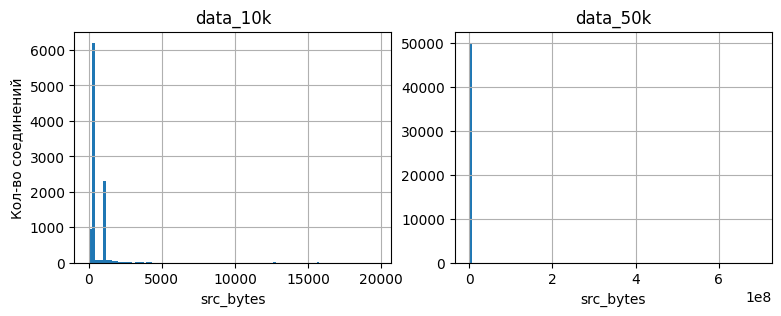

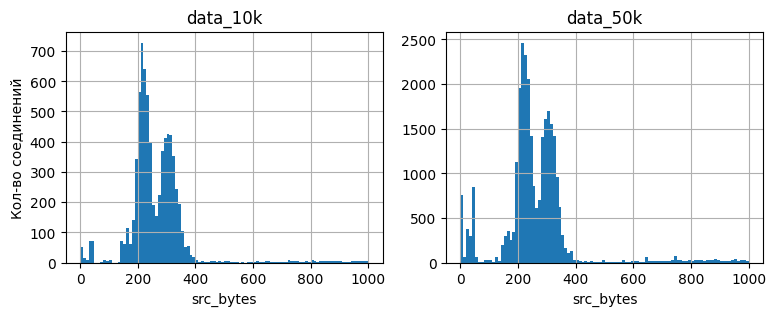

In [14]:
show_info('src_bytes')
show_hist('src_bytes')
show_hist('src_bytes', d1_to=1000, d5_from=1, d5_to=1000)
show_linearly_related('src_bytes')

*Комментарий*: "src_bytes" не имеет сильной линейной связи с другими атрибутами. Имеются значения с сильным разбросом (осбенно в data_50k). Данные кучуются в районе 170-400 байт.  
[Перейти к итогам](#fg6)

**5) dst_bytes:** <a id="f5"></a>количество байт данных, переданных от адресата к источнику в одном соединении.

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,3276.09,8775.83,0.0,237.75,891.0,2739.25,271733.0
[Y=1] data_10k,2213.0,4.23,103.05,0.0,0.00,0.0,0.00,2957.0
[Y=0] data_10k,7787.0,4205.93,9746.52,0.0,497.50,1471.0,3857.00,271733.0
data_50k,50000.0,3232.55,32113.59,0.0,0.00,354.0,2227.00,2661605.0


**Наиболее линейно-зависимые атрибуты к "dst_bytes":**

,count,srv_count,dst_host_same_src_port_rate
data_10k,-0.2,-0.2,-0.17


,count,srv_count,dst_host_same_src_port_rate
data_50k,-0.06,-0.05,-0.05


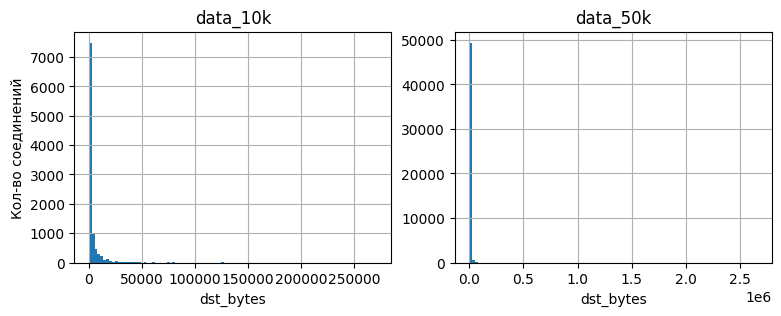

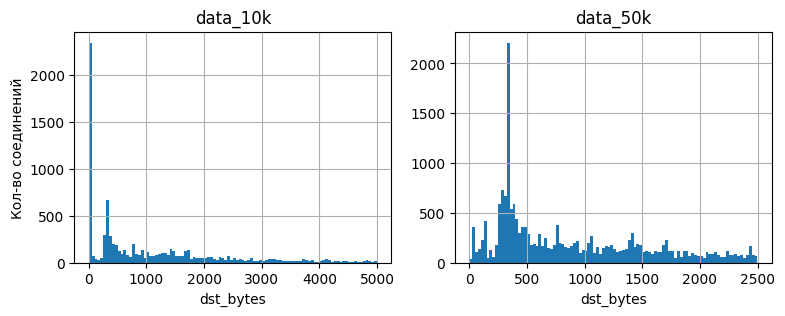

In [15]:
show_info('dst_bytes')
show_hist('dst_bytes')
show_hist('dst_bytes', d1_to=5000, d5_from=1, d5_to=2500)
show_linearly_related('dst_bytes')

*Комментарий*: в "dst_bytes" отсутствует какая-либо линейная связь с другими атрибутами. Имеются значения с сильным разбросом (осбенно в data_50k).  
[Перейти к итогам](#fg6)

**6) land:** <a id="f6"></a>IP-адреса и номера портов источника и назначения равны?

In [16]:
show_info('land')

**Тип:** логическое значение (1 - Да, 0 - Нет).

land,0,1
data_10k,10000.0,NaN
[Y=1] data_10k,2213.0,NaN
[Y=0] data_10k,7787.0,NaN
data_50k,49999.0,1.0


*Комментарий*: хоть в data_50k имеется одна запись с 1, будем считать, что данный атрибут не имеет уникальных значений, а значит в дальнейшем его можно не рассматривать.  
[Перейти к итогам](#fg6)

**7) wrong_fragment:** <a id="f7"></a>общее количество ошибочных фрагментов в данном соединении.

In [17]:
show_info('wrong_fragment')
show_not_zero('wrong_fragment', index=3)

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
[Y=1] data_10k,2213.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
data_50k,50000.0,0.01,0.13,0.0,0.0,0.0,0.0,3.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_50k,119.0,2.65,0.77,1.0,3.0,3.0,3.0,3.0


*Комментарий*: скорее всего данный атрибут можно не рассматривать при обучении.  
[Перейти к итогам](#fg6)

**8) urgent:** <a id="f8"></a>количество срочных пакетов в данном соединении. Срочные пакеты - это пакеты с активированным битом срочности.

In [18]:
show_info('urgent')
show_not_zero('urgent', index=3)

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
[Y=1] data_10k,2213.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
data_50k,50000.0,0.0,0.01,0.0,0.0,0.0,0.0,2.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_50k,2.0,1.5,0.71,1.0,1.25,1.5,1.75,2.0


*Комментарий*: скорее всего данный атрибут можно не рассматривать при обучении.  
[Перейти к итогам](#fg6)

#### 2.2.3. Контентные характеристики каждого вектора сетевого подключения <a id="fg3"></a>

**9) hot:** <a id="f9"></a>количество "особых" индикаторов в содержимом, таких как: вход в системный каталог, создание программ и выполнение программ.

In [19]:
show_info('hot')
show_not_zero('hot')

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.04,0.84,0.0,0.0,0.0,0.0,30.0
[Y=1] data_10k,2213.0,0.00,0.10,0.0,0.0,0.0,0.0,3.0
[Y=0] data_10k,7787.0,0.05,0.95,0.0,0.0,0.0,0.0,30.0
data_50k,50000.0,0.11,0.80,0.0,0.0,0.0,0.0,30.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,47.0,7.94,9.46,1.0,1.0,4.0,10.0,30.0
[Y=1] data_10k,3.0,2.67,0.58,2.0,2.5,3.0,3.0,3.0
[Y=0] data_10k,44.0,8.30,9.68,1.0,1.0,4.0,14.0,30.0
data_50k,2214.0,2.46,2.92,1.0,2.0,2.0,2.0,30.0


*Комментарий*: для "hot" в наборе data_10k содержаться только 3 атаки и скорее всего атрибут не подойдет для обучения.  
[Перейти к итогам](#fg6)

**10) num_failed_logins:** <a id="f10"></a>количество неудачных попыток входа в систему.

In [20]:
show_info('num_failed_logins')
show_not_zero('num_failed_logins', index=3)

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
[Y=1] data_10k,2213.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
data_50k,50000.0,0.0,0.04,0.0,0.0,0.0,0.0,5.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_50k,57.0,1.14,0.67,1.0,1.0,1.0,1.0,5.0


*Комментарий*: скорее всего данный атрибут можно не рассматривать при обучении.  
[Перейти к итогам](#fg6)

**11) logged_in:** <a id="f11"></a>вход в систему прошёл успешно?

In [21]:
show_info('logged_in')

**Тип:** логическое значение (1 - Да, 0 - Нет).

logged_in,1,0
data_10k,7570,2430
[Y=1] data_10k,4,2209
[Y=0] data_10k,7566,221
data_50k,30590,19410


*Комментарий*: получается, что если не было успешного входа в систему, то с высокой вероятностью была атака.  
[Перейти к итогам](#fg6)

**12) num_compromised:** <a id="f12"></a>количество состояний "compromised".

In [22]:
show_info('num_compromised')
show_not_zero('num_compromised')

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.04,0.0,0.0,0.0,0.0,2.0
[Y=1] data_10k,2213.0,0.00,0.06,0.0,0.0,0.0,0.0,2.0
[Y=0] data_10k,7787.0,0.00,0.03,0.0,0.0,0.0,0.0,2.0
data_50k,50000.0,0.05,3.44,0.0,0.0,0.0,0.0,767.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,5.0,1.60,0.55,1.0,1.00,2.0,2.00,2.0
[Y=1] data_10k,3.0,1.67,0.58,1.0,1.50,2.0,2.00,2.0
[Y=0] data_10k,2.0,1.50,0.71,1.0,1.25,1.5,1.75,2.0
data_50k,1955.0,1.41,17.33,1.0,1.00,1.0,1.00,767.0


*Комментарий*: в размеченном наборе, только 3 состояниям соотвествуют атаки и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**13) root_shell:** <a id="f13"></a>получен ли root shell?

In [23]:
show_info('root_shell')

**Тип:** логическое значение (1 - Да, 0 - Нет).

root_shell,0,1
data_10k,9991,9
[Y=1] data_10k,2209,4
[Y=0] data_10k,7782,5
data_50k,49989,11


*Комментарий*: выходит, что атрибут не дает определить наличие атаки в соединении.  
[Перейти к итогам](#fg6)

**14) su_attempted:** <a id="f14"></a>была ли попытка использовать "su root"?

In [24]:
show_info('su_attempted')

**Тип:** логическое значение (1 - Да, 0 - Нет).

su_attempted,0,1,2
data_10k,10000.0,NaN,NaN
[Y=1] data_10k,2213.0,NaN,NaN
[Y=0] data_10k,7787.0,NaN,NaN
data_50k,49998.0,1.0,1.0


*Комментарий*: поскольку в data_50k имеется только одна 1 и при этом есть опечатка (2), то будем считать, что данный атрибут не имеет уникальных значений, а значит в дальнейшем его можно не рассматривать.  
[Перейти к итогам](#fg6)

**15) num_root:** <a id="f15"></a>количество обращений к "root" или количество операций, выполненных от имени "root" в соединении.

In [25]:
show_info('num_root')
show_not_zero('num_root')

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.03,0.0,0.0,0.0,0.0,2.0
[Y=1] data_10k,2213.0,0.00,0.04,0.0,0.0,0.0,0.0,2.0
[Y=0] data_10k,7787.0,0.00,0.02,0.0,0.0,0.0,0.0,2.0
data_50k,50000.0,0.03,3.85,0.0,0.0,0.0,0.0,857.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,2.0,2.00,0.00,2.0,2.0,2.0,2.00,2.0
[Y=1] data_10k,1.0,2.00,NaN,2.0,2.0,2.0,2.00,2.0
[Y=0] data_10k,1.0,2.00,NaN,2.0,2.0,2.0,2.00,2.0
data_50k,178.0,8.93,64.02,1.0,1.0,2.0,8.25,857.0


*Комментарий*: только одному обращению соответствует атака, скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**16) num_file_creations:** <a id="f16"></a>количество операций создания файлов в соединении.

In [26]:
show_info('num_file_creations')
show_not_zero('num_file_creations')

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.0,0.06,0.0,0.0,0.0,0.0,4.0
[Y=1] data_10k,2213.0,0.0,0.10,0.0,0.0,0.0,0.0,4.0
[Y=0] data_10k,7787.0,0.0,0.04,0.0,0.0,0.0,0.0,2.0
data_50k,50000.0,0.0,0.17,0.0,0.0,0.0,0.0,28.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,10.0,1.60,0.97,1.0,1.0,1.0,2.00,4.0
[Y=1] data_10k,4.0,2.00,1.41,1.0,1.0,1.5,2.50,4.0
[Y=0] data_10k,6.0,1.33,0.52,1.0,1.0,1.0,1.75,2.0
data_50k,75.0,2.03,3.94,1.0,1.0,1.0,1.00,28.0


*Комментарий*: только 4 операциям соответствует атака и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**17) num_shells:** <a id="f17"></a>количество запросов оболочки.

In [27]:
show_info('num_shells')
show_not_zero('num_shells')

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.0,0.02,0.0,0.0,0.0,0.0,2.0
[Y=1] data_10k,2213.0,0.0,0.05,0.0,0.0,0.0,0.0,2.0
[Y=0] data_10k,7787.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
data_50k,50000.0,0.0,0.01,0.0,0.0,0.0,0.0,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,2.0,1.5,0.71,1.0,1.25,1.5,1.75,2.0
[Y=1] data_10k,2.0,1.5,0.71,1.0,1.25,1.5,1.75,2.0
[Y=0] data_10k,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_50k,11.0,1.0,0.00,1.0,1.00,1.0,1.00,1.0


*Комментарий*: только 2 запроса соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**18) num_access_files:** <a id="f18"></a>количество операций над файлами контроля доступа.

In [28]:
show_info('num_access_files')
show_not_zero('num_access_files', index=[2, 3])

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.0,0.04,0.0,0.0,0.0,0.0,2.0
[Y=1] data_10k,2213.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.0,0.05,0.0,0.0,0.0,0.0,2.0
data_50k,50000.0,0.0,0.07,0.0,0.0,0.0,0.0,6.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
[Y=0] data_10k,10.0,1.2,0.42,1.0,1.0,1.0,1.0,2.0
data_50k,163.0,1.1,0.50,1.0,1.0,1.0,1.0,6.0


*Комментарий*: в данном атрибуте нельзя выявить атаку.  
[Перейти к итогам](#fg6)

**19) num_outbound_cmds:** <a id="f19"></a>количество исходящих команд в FTP-сессии.

In [29]:
show_info('num_outbound_cmds')

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[Y=1] data_10k,2213.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data_50k,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Комментарий*: атрибут не информативен.  
[Перейти к итогам](#fg6)

**20) is_host_login:** <a id="f20"></a>принадлежит ли логин к списку "особых": root, admin и т. д.?

In [30]:
show_info('is_host_login')

**Тип:** логическое значение (1 - Да, 0 - Нет).

is_host_login,0
data_10k,10000
[Y=1] data_10k,2213
[Y=0] data_10k,7787
data_50k,50000


*Комментарий*: атрибут не информативен.  
[Перейти к итогам](#fg6)

**21) is_guest_login:** <a id="f21"></a>используется «гостевой» логин?

In [31]:
show_info('is_guest_login')

**Тип:** логическое значение (1 - Да, 0 - Нет).

is_guest_login,0,1
data_10k,9972.0,28.0
[Y=1] data_10k,2213.0,NaN
[Y=0] data_10k,7759.0,28.0
data_50k,49865.0,135.0


*Комментарий*: атрибут не позволяет выявить атаку.  
[Перейти к итогам](#fg6)

#### 2.2.4. Временные характеристики трафика каждого вектора сетевого соединения <a id="fg4"></a>

**22) count:** <a id="f22"></a>количество соединений с тем же хостом назначения, что и текущее соединение, за последние две секунды.

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,118.69,207.37,1.0,3.0,9.0,29.0,511.0
[Y=1] data_10k,2213.0,505.24,45.99,1.0,511.0,511.0,511.0,511.0
[Y=0] data_10k,7787.0,8.83,9.02,1.0,2.0,6.0,13.0,80.0
data_50k,50000.0,123.10,193.31,1.0,2.0,11.0,198.0,511.0


**Наиболее линейно-зависимые атрибуты к "count":**

,srv_count,dst_host_same_src_port_rate,dst_host_count
data_10k,1.0,0.92,0.53


,srv_count,dst_host_same_src_port_rate,dst_host_count
data_50k,0.94,0.79,0.49


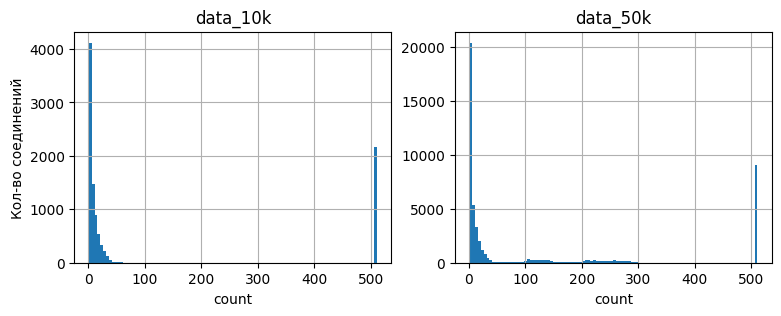

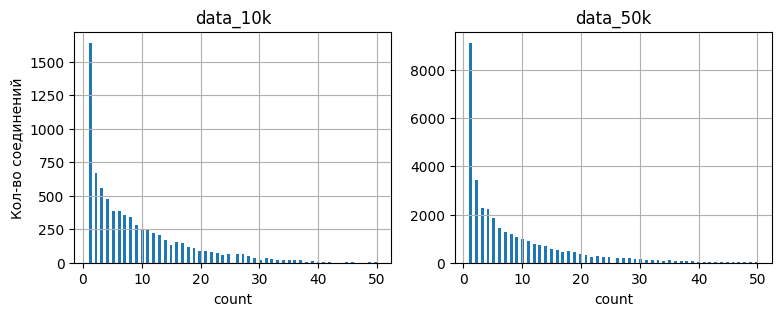

In [32]:
show_info('count')
show_hist('count')
show_hist('count', d1_to=50, d5_to=50)
show_linearly_related('count')

*Комментарий*: большая часть записисей близка к 1. Атакам больше соотвествует значение 511. Полчается, что атрибут взаимозаменяем с   [srv_count](#f23) и хорошо связан с [dst_host_same_src_port_rate](#f35).  
[Перейти к итогам](#fg6)

**23) srv_count:** <a id="f23"></a>количество соединений с тем же сервисом (номер порта) , что и текущее соединение, за последние две секунды.

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,120.52,206.46,1.0,4.0,12.0,35.0,511.0
[Y=1] data_10k,2213.0,505.24,46.00,1.0,511.0,511.0,511.0,511.0
[Y=0] data_10k,7787.0,11.18,10.79,1.0,3.0,8.0,16.0,80.0
data_50k,50000.0,102.37,192.56,1.0,3.0,10.0,29.0,511.0


**Наиболее линейно-зависимые атрибуты к "srv_count":**

,count,dst_host_same_src_port_rate,dst_host_count
data_10k,1.0,0.92,0.53


,count,dst_host_same_src_port_rate,dst_host_count
data_50k,0.94,0.87,0.39


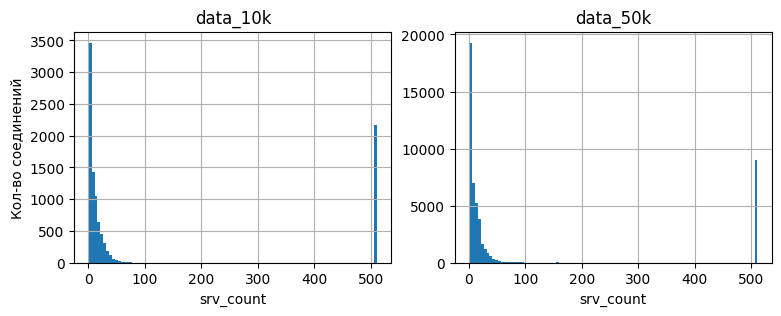

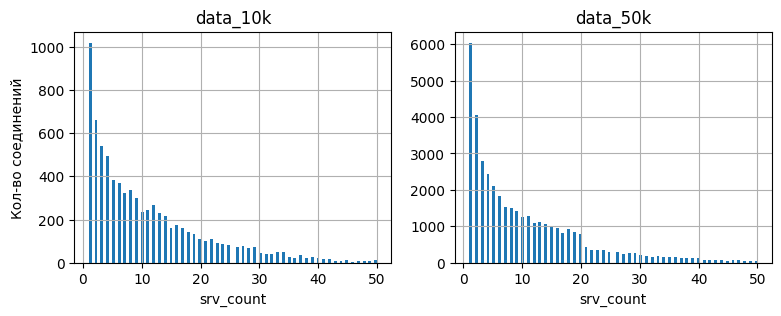

In [33]:
show_info('srv_count')
show_hist('srv_count')
show_hist('srv_count', d1_to=50, d5_to=50)
show_linearly_related('srv_count')

*Комментарий*: большая часть записисей близка к 1. Атакам больше соотвествует значение 511. Полчается, что атрибут взаимозаменяем с   [count](#f22) и хорошо связан с [dst_host_same_src_port_rate](#f35).  
[Перейти к итогам](#fg6)

**24) serror_rate:** <a id="f24"></a>процент соединений, активировавших [flag (3)](#f3) s0, s1, s2 или s3, среди соединений, объединенных в [count (22)](#f22).

In [34]:
show_info('serror_rate')
show_not_zero('serror_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.02,0.0,0.0,0.0,0.0,1.00
[Y=1] data_10k,2213.0,0.00,0.03,0.0,0.0,0.0,0.0,0.94
[Y=0] data_10k,7787.0,0.00,0.02,0.0,0.0,0.0,0.0,1.00
data_50k,50000.0,0.13,0.34,0.0,0.0,0.0,0.0,1.00


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,57.0,0.16,0.20,0.03,0.06,0.10,0.20,1.00
[Y=1] data_10k,2.0,0.88,0.08,0.83,0.86,0.88,0.91,0.94
[Y=0] data_10k,55.0,0.14,0.15,0.03,0.06,0.09,0.18,1.00
data_50k,6735.0,0.98,0.14,0.02,1.00,1.00,1.00,1.00


*Комментарий*: только 2 записи соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**25) srv_serror_rate:** <a id="f25"></a>процент соединений, активировавших [flag (3)](#f3) s0, s1, s2 или s3, среди соединений, объединенных в [srv_count (23)](#f23)

In [35]:
show_info('srv_serror_rate')
show_not_zero('srv_serror_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.02,0.0,0.0,0.0,0.0,1.0
[Y=1] data_10k,2213.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
[Y=0] data_10k,7787.0,0.00,0.02,0.0,0.0,0.0,0.0,1.0
data_50k,50000.0,0.13,0.34,0.0,0.0,0.0,0.0,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,69.0,0.14,0.21,0.02,0.04,0.08,0.17,1.0
[Y=1] data_10k,2.0,1.00,0.00,1.00,1.00,1.00,1.00,1.0
[Y=0] data_10k,67.0,0.12,0.15,0.02,0.04,0.07,0.13,1.0
data_50k,6772.0,0.97,0.16,0.02,1.00,1.00,1.00,1.0


*Комментарий*: только 2 записи соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**26) rerror_rate:** <a id="f26"></a>процент соединений, активировавших [flag (3)](#f3) REJ, среди соединений, объединенных в [count (22)](#f22).

In [36]:
show_info('rerror_rate')
show_not_zero('rerror_rate', index=[2, 3])

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
[Y=1] data_10k,2213.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
data_50k,50000.0,0.03,0.16,0.0,0.0,0.0,0.0,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
[Y=0] data_10k,8.0,1.00,0.00,1.00,1.0,1.0,1.0,1.0
data_50k,1546.0,0.88,0.27,0.08,1.0,1.0,1.0,1.0


*Комментарий*: в данном атрибуте нельзя выявить атаку.  
[Перейти к итогам](#fg6)

**27) srv_rerror_rate:** <a id="f27"></a>процент соединений, активировавших [flag (3)](#f3) REJ, среди соединений, объединенных в [srv_count (23)](#f23).

In [37]:
show_info('srv_rerror_rate')
show_not_zero('srv_rerror_rate', index=[2, 3])

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
[Y=1] data_10k,2213.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
data_50k,50000.0,0.03,0.16,0.0,0.0,0.0,0.0,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
[Y=0] data_10k,8.0,1.00,0.00,1.00,1.00,1.0,1.0,1.0
data_50k,2013.0,0.74,0.35,0.04,0.33,1.0,1.0,1.0


*Комментарий*: в данном атрибуте нельзя выявить атаку.  
[Перейти к итогам](#fg6)

**28) same_srv_rate:** <a id="f28"></a>процент соединений с одним и тем же сервисом среди соединений, объединенных в [count (22)](#f22).

In [38]:
show_info('same_srv_rate')
show_not_one('same_srv_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,1.00,0.03,0.33,1.0,1.0,1.0,1.0
[Y=1] data_10k,2213.0,1.00,0.00,0.83,1.0,1.0,1.0,1.0
[Y=0] data_10k,7787.0,1.00,0.04,0.33,1.0,1.0,1.0,1.0
data_50k,50000.0,0.88,0.32,0.00,1.0,1.0,1.0,1.0


**Если убрать единичные значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,45.0,0.58,0.21,0.33,0.50,0.50,0.67,0.99
[Y=1] data_10k,2.0,0.88,0.08,0.83,0.86,0.88,0.91,0.94
[Y=0] data_10k,43.0,0.57,0.20,0.33,0.50,0.50,0.50,0.99
data_50k,6725.0,0.08,0.12,0.00,0.03,0.06,0.09,0.99


*Комментарий*: только 2 записи соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**29) diff_srv_rate:** <a id="f29"></a>процент соединений с разными сервисами, среди соединений, объединенных в [count (22)](#f22).

In [39]:
show_info('diff_srv_rate')
show_not_zero('diff_srv_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.06,0.0,0.0,0.0,0.0,1.00
[Y=1] data_10k,2213.0,0.00,0.01,0.0,0.0,0.0,0.0,0.33
[Y=0] data_10k,7787.0,0.00,0.06,0.0,0.0,0.0,0.0,1.00
data_50k,50000.0,0.01,0.07,0.0,0.0,0.0,0.0,1.00


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,45.0,0.74,0.37,0.03,0.67,1.00,1.00,1.00
[Y=1] data_10k,2.0,0.22,0.15,0.12,0.17,0.22,0.28,0.33
[Y=0] data_10k,43.0,0.77,0.36,0.03,0.67,1.00,1.00,1.00
data_50k,6758.0,0.09,0.16,0.01,0.06,0.06,0.07,1.00


*Комментарий*: только 2 записи соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**30) srv_diff_host_rate:** <a id="f30"></a>процент соединений с разными машинами назначения среди соединений, объединенных в [srv_count (23)](#f23).

In [40]:
show_info('srv_diff_host_rate')
show_not_zero('srv_diff_host_rate', index=[2, 3])

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.10,0.23,0.0,0.0,0.0,0.08,1.0
[Y=1] data_10k,2213.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0
[Y=0] data_10k,7787.0,0.12,0.25,0.0,0.0,0.0,0.14,1.0
data_50k,50000.0,0.10,0.24,0.0,0.0,0.0,0.04,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
[Y=0] data_10k,2839.0,0.34,0.31,0.03,0.12,0.20,0.43,1.0
data_50k,12838.0,0.38,0.35,0.01,0.12,0.22,0.67,1.0


*Комментарий*: в данном атрибуте нельзя выявить атаку.  
[Перейти к итогам](#fg6)

#### 2.2.5. Особенности трафика на основе хоста в векторе сетевого соединения <a id="fg5"></a>

**31) dst_host_count:** <a id="f31"></a>количество соединений с одинаковым IP-адресом хоста назначения.

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,150.88,106.20,1.0,34.0,178.0,255.0,255.0
[Y=1] data_10k,2213.0,254.07,13.32,1.0,255.0,255.0,255.0,255.0
[Y=0] data_10k,7787.0,121.56,102.71,1.0,23.0,84.0,255.0,255.0
data_50k,50000.0,171.09,102.45,0.0,57.0,255.0,255.0,255.0


**Наиболее линейно-зависимые атрибуты к "dst_host_count":**

,dst_host_srv_diff_host_rate,count,srv_count
data_10k,-0.59,0.53,0.53


,count,dst_host_srv_diff_host_rate,srv_count
data_50k,0.49,-0.42,0.39


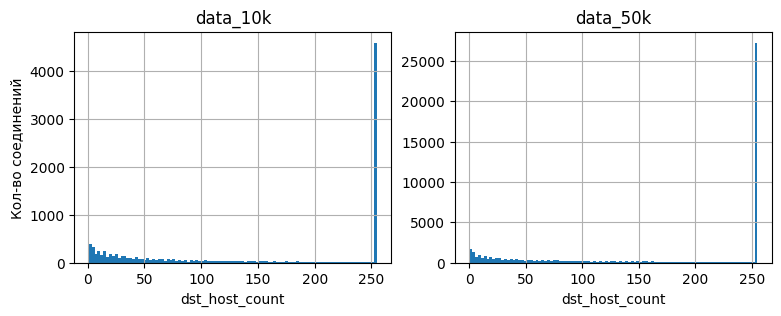

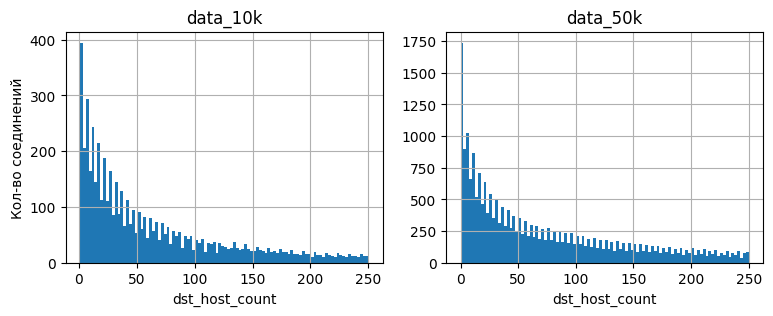

In [41]:
show_info('dst_host_count')
show_hist('dst_host_count')
show_hist('dst_host_count', d1_to=250, d5_to=250)
show_linearly_related('dst_host_count')

*Комментарий*: атрибут в основном имеет тенденцию к небольшому количеству соединений с одинаковым IP-адресом хоста назначения, в среднем 150-170, при этом если значение достигает 255, то с наибольшей вероятностью это была атака.  
[Перейти к итогам](#fg6)

**32) dst_host_srv_count:** <a id="f32"></a>количество соединений с одинаковым номером порта.

In [42]:
show_info('dst_host_srv_count')
display(Markdown('**Если убрать значение 255:**'))
show_not_value('dst_host_srv_count', value=255)

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,240.94,48.19,1.0,255.0,255.0,255.0,255.0
[Y=1] data_10k,2213.0,252.84,20.45,2.0,255.0,255.0,255.0,255.0
[Y=0] data_10k,7787.0,237.56,53.03,1.0,255.0,255.0,255.0,255.0
data_50k,50000.0,200.72,94.24,0.0,175.0,255.0,255.0,255.0


**Если убрать значение 255:**

,count,mean,std,min,25%,50%,75%,max
data_10k,1206.0,138.39,85.45,1.0,48.25,157.5,219.00,253.0
[Y=1] data_10k,32.0,105.28,83.85,2.0,21.25,98.0,175.50,253.0
[Y=0] data_10k,1174.0,139.29,85.34,1.0,50.00,161.5,219.00,253.0
data_50k,15104.0,75.31,82.85,0.0,10.00,21.0,137.25,254.0


*Комментарий*: только 32 записи соответствуют атаке и возможно атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**33) dst_host_same_srv_rate:** <a id="f33"></a>процент соединений с одним и тем же сервисом среди соединений, объединенных в [dst_host_count (31)](#f31).

In [43]:
show_info('dst_host_same_srv_rate')
show_not_one('dst_host_same_srv_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.98,0.11,0.00,1.0,1.0,1.0,1.0
[Y=1] data_10k,2213.0,0.99,0.06,0.02,1.0,1.0,1.0,1.0
[Y=0] data_10k,7787.0,0.97,0.12,0.00,1.0,1.0,1.0,1.0
data_50k,50000.0,0.82,0.35,0.00,1.0,1.0,1.0,1.0


**Если убрать единичные значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,727.0,0.71,0.29,0.00,0.58,0.81,0.95,0.99
[Y=1] data_10k,27.0,0.50,0.29,0.02,0.29,0.48,0.74,0.99
[Y=0] data_10k,700.0,0.71,0.29,0.00,0.61,0.82,0.95,0.99
data_50k,12324.0,0.28,0.33,0.00,0.04,0.07,0.55,0.99


*Комментарий*: только 27 записей соответствуют атаке и возможно атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**34) dst_host_diff_srv_rate:** <a id="f34"></a>процент соединений с разными сервисами среди соединений, объединенных в [dst_host_count (31)](#f31).

In [44]:
show_info('dst_host_diff_srv_rate')
show_not_zero('dst_host_diff_srv_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.03,0.0,0.0,0.0,0.00,1.00
[Y=1] data_10k,2213.0,0.00,0.00,0.0,0.0,0.0,0.00,0.06
[Y=0] data_10k,7787.0,0.01,0.04,0.0,0.0,0.0,0.00,1.00
data_50k,50000.0,0.02,0.08,0.0,0.0,0.0,0.01,1.00


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,727.0,0.07,0.10,0.01,0.02,0.04,0.07,1.00
[Y=1] data_10k,27.0,0.01,0.01,0.01,0.01,0.01,0.02,0.06
[Y=0] data_10k,700.0,0.07,0.10,0.01,0.02,0.04,0.08,1.00
data_50k,12555.0,0.08,0.14,0.01,0.03,0.07,0.07,1.00


*Комментарий*: только 27 записей соответствуют атаке и возможно атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**35) dst_host_same_src_port_rate:** <a id="f35"></a>процент соединений с одним и тем же портом источника среди соединений, объединенных в [dst_host_srv_count (32)](#f32).

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.27,0.41,0.00,0.0,0.03,0.50,1.0
[Y=1] data_10k,2213.0,0.99,0.07,0.01,1.0,1.00,1.00,1.0
[Y=0] data_10k,7787.0,0.07,0.17,0.00,0.0,0.01,0.05,1.0
data_50k,50000.0,0.25,0.40,0.00,0.0,0.01,0.33,1.0


**Наиболее линейно-зависимые атрибуты к "dst_host_same_src_port_rate":**

,count,srv_count,src_bytes
data_10k,0.92,0.92,0.36


,srv_count,count,dst_host_same_srv_rate
data_50k,0.87,0.79,0.25


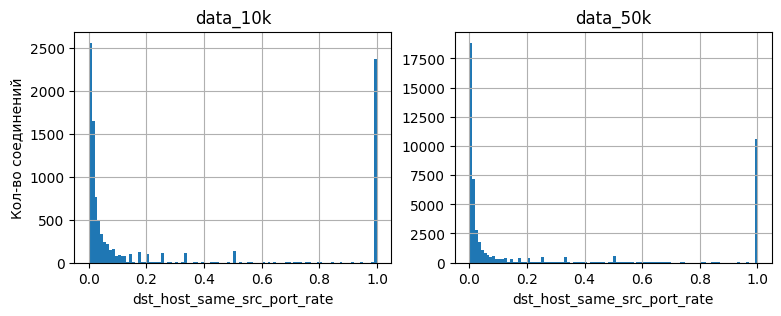

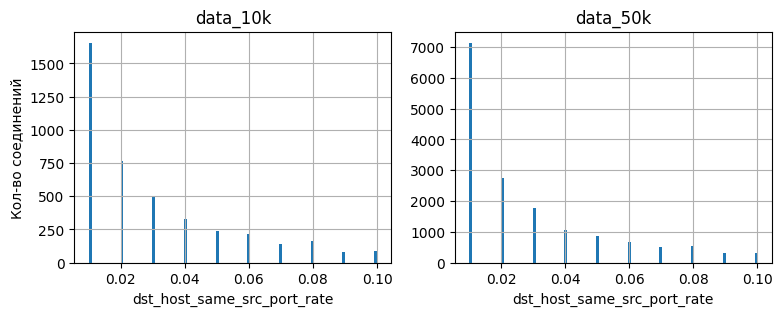

In [45]:
show_info('dst_host_same_src_port_rate')
show_hist('dst_host_same_src_port_rate')
show_hist('dst_host_same_src_port_rate', d1_from=0.01, d5_from=0.01, d1_to=0.1, d5_to=0.1)
show_linearly_related('dst_host_same_src_port_rate')

*Комментарий*: атрибут склонен к отсутствию соединений с одним и тем же портом источника. При этом имеется значительная связь с [count](#f22) и [srv_count](#f23). Если значение достигает 1, то скорее всего произошла атака.  
[Перейти к итогам](#fg6)

**36) dst_host_srv_diff_host_rate:** <a id="f36"></a>процент соединений с разными машинами назначения среди соединений, объединенных в [dst_host_srv_count (32)](#f32).

In [46]:
show_info('dst_host_srv_diff_host_rate')
show_not_zero('dst_host_srv_diff_host_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.02,0.03,0.0,0.0,0.01,0.03,1.00
[Y=1] data_10k,2213.0,0.00,0.02,0.0,0.0,0.00,0.00,0.67
[Y=0] data_10k,7787.0,0.02,0.03,0.0,0.0,0.02,0.04,1.00
data_50k,50000.0,0.02,0.07,0.0,0.0,0.00,0.02,1.00


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,5036.0,0.04,0.03,0.01,0.02,0.03,0.05,1.00
[Y=1] data_10k,5.0,0.38,0.21,0.12,0.30,0.33,0.50,0.67
[Y=0] data_10k,5031.0,0.04,0.03,0.01,0.02,0.03,0.05,1.00
data_50k,20177.0,0.06,0.11,0.01,0.02,0.03,0.05,1.00


*Комментарий*: только 5 записей соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**37) dst_host_serror_rate:** <a id="f37"></a>процент соединений, активировавших [flag (3)](#f3) s0, s1, s2 или s3, среди соединений, объединенных в [dst_host_count (31)](#f31).

In [47]:
show_info('dst_host_serror_rate')
show_not_zero('dst_host_serror_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.02,0.0,0.0,0.0,0.0,1.0
[Y=1] data_10k,2213.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
[Y=0] data_10k,7787.0,0.00,0.02,0.0,0.0,0.0,0.0,1.0
data_50k,50000.0,0.13,0.34,0.0,0.0,0.0,0.0,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,273.0,0.04,0.12,0.01,0.01,0.01,0.02,1.0
[Y=1] data_10k,2.0,1.00,0.00,1.00,1.00,1.00,1.00,1.0
[Y=0] data_10k,271.0,0.04,0.09,0.01,0.01,0.01,0.02,1.0
data_50k,7607.0,0.86,0.34,0.01,1.00,1.00,1.00,1.0


*Комментарий*: только 2 записи соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**38) dst_host_srv_serror_rate:** <a id="f38"></a>процент соединений, активировавших [flag (3)](#f3) s0, s1, s2 или s3, среди соединений, объединенных в [dst_host_srv_count (32)](#f32).

In [48]:
show_info('dst_host_srv_serror_rate')
show_not_zero('dst_host_srv_serror_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.02,0.0,0.0,0.0,0.0,0.94
[Y=1] data_10k,2213.0,0.00,0.03,0.0,0.0,0.0,0.0,0.94
[Y=0] data_10k,7787.0,0.00,0.01,0.0,0.0,0.0,0.0,0.84
data_50k,50000.0,0.13,0.34,0.0,0.0,0.0,0.0,1.00


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,178.0,0.03,0.11,0.01,0.01,0.01,0.01,0.94
[Y=1] data_10k,2.0,0.88,0.08,0.83,0.86,0.88,0.91,0.94
[Y=0] data_10k,176.0,0.02,0.07,0.01,0.01,0.01,0.01,0.84
data_50k,7495.0,0.88,0.33,0.01,1.00,1.00,1.00,1.00


*Комментарий*: только 2 записи соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**39) dst_host_rerror_rate:** <a id="f39"></a>процент соединений, активировавших [flag (3)](#f3) REJ, среди соединений, объединенных в [dst_host_count (31)](#f31).

In [49]:
show_info('dst_host_rerror_rate')
show_not_zero('dst_host_rerror_rate', index=[2, 3])

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
[Y=1] data_10k,2213.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
data_50k,50000.0,0.03,0.16,0.0,0.0,0.0,0.0,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
[Y=0] data_10k,15.0,0.55,0.50,0.01,0.03,1.00,1.0,1.0
data_50k,3671.0,0.39,0.44,0.01,0.04,0.05,1.0,1.0


*Комментарий*: в данном атрибуте нельзя выявить атаку.  
[Перейти к итогам](#fg6)

**40) dst_host_srv_rerror_rate:** <a id="f40"></a>процент соединений, активировавших [flag (3)](#f3) REJ, среди соединений, объединенных в [dst_host_srv_count (32)](#f32).

In [50]:
show_info('dst_host_srv_rerror_rate')
show_not_zero('dst_host_srv_rerror_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
[Y=1] data_10k,2213.0,0.00,0.00,0.0,0.0,0.0,0.0,0.1
[Y=0] data_10k,7787.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
data_50k,50000.0,0.03,0.15,0.0,0.0,0.0,0.0,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,10.0,0.84,0.35,0.10,1.00,1.00,1.00,1.0
[Y=1] data_10k,1.0,0.10,NaN,0.10,0.10,0.10,0.10,0.1
[Y=0] data_10k,9.0,0.92,0.25,0.25,1.00,1.00,1.00,1.0
data_50k,3512.0,0.39,0.45,0.01,0.04,0.05,0.98,1.0


*Комментарий*: только 1 запись соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

#### 2.2.6. Общий итог по анализу данных <a id="fg6"></a>

Примем сокращения:
* d1 - размеченный набор данных (data_10k);
* y1 - набор data_10k с атакой ([Y=1] data_10k);
* y0 - набор data_10k без атаки ([Y=0] data_10k);
* d5 - неразмеченный набор данных (data_50k).

Для формирования наборов можно не рассматривать атрибуты:
* не имеющие уникальных значений ([land](#f6), [su_attempted](#f14), [num_outbound_cmds](#f19), [is_host_login](#f20));
* не являющиейся достаточно информативными ([root_shell](#f13), [is_guest_login](#f21));
* не имеющие уникальных значений в data_10k, но содержащих немного ненулевых данных в data_50k:

|Атрибут|d5|
|-|:-:|
|[wrong_fragment](#f7)|119|
|[urgent](#f8)|2|
|[num_failed_logins](#f10)|57|

Также с большей вероятностью, можно не рассматривать атрибуты:
* с малым количеством записей при ненулевых значениях (y1, y2 < 100 при value != 0)

|Атрибут|y1|y0|d5|
|-|:-:|:-:|:-:|
|[hot](#f9)|3|44|2214|
|[num_compromised](#f12)|3|2|1 955|
|[num_root](#f15)|1|1|178|
|[num_file_creations](#f16)|4|6|75|
|[num_shells](#f17)|2|0|11|
|[serror_rate](#f24)|2|55|6 735|
|[srv_serror_rate](#f25)|2|67|6 772|
|[diff_srv_rate](#f29)|2|43|6 758|
|[dst_host_srv_rerror_rate](#f40)|1|9|3 512|

* с малым количеством атак при ненулевых значениях (y1 < 50 при value != 0):

|Атрибут|y1|y0|d5|
|-|:-:|:-:|:-:|
|[duration](#f0)|4|265|1 650|
|[dst_host_diff_srv_rate](#f34)|27|700|12 555|
|[dst_host_srv_diff_host_rate](#f36)|5|5031|20 177|
|[dst_host_serror_rate](#f37)|2|271|7 607|
|[dst_host_srv_serror_rate](#f38)|2|176|7 495|

* с малым количеством атак при неединичных значениях (y1 < 50 при value != 1):

|Атрибут|y1|y0|d5|
|-|:-:|:-:|:-:|
|[same_srv_rate](#f28)|2|43|6 725|
|[dst_host_same_srv_rate](#f33)|27|700|12 324|

* с малым количеством атак при отсутствии значения 255 (y1 < 50 при value != 255):

|Атрибут|y1|y0|d5|
|-|:-:|:-:|:-:|
|[dst_host_srv_count](#f32)|32|1 174|15 104|

* с отсутствием атак при ненулевых значениях (y1 is NaN при value != 0):

|Атрибут|y0|d5|
|-|:-:|:-:|
|[num_access_files](#f18)|10|163|
|[rerror_rate](#f26)|8|1 546|
|[srv_rerror_rate](#f27)|8|2 013|
|[srv_diff_host_rate](#f30)|2 839|12 838|
|[dst_host_rerror_rate](#f39)|15|3 671|

Под сомнением остаются атрибуты:
* [protocol_type](#f1) - с атакой в основном связаны ICMP-пакеты;
* [service](#f2) - с атакой в основном связана служба ecr_i;
* [flag](#f3) - с атакой в основном связан флаг SF.

Тогда остаются атрибуты:
* Основные: [src_bytes](#f4), [dst_bytes](#f5);
* Контентные: [logged_in](#f11);
* Временные: [count](#f22), [srv_count](#f23);
* Хостовые: [dst_host_count](#f31), [dst_host_same_src_port_rate](#f35).

Все они (кроме логического атрибута [logged_in](#f11)) имеют значения с очень большой величиной, по сравнению с остальным числами.

## 3. Пользовательские наборы данных <a id="сustom_ds"></a>
### 3.1. Анализ относительно "Attack type" <a id="analysis_at"></a>
В [пункте 2.2.1](#fg1) был сформирован вектор Y, содержащий числовые значения "Attack type" (0 - нет атаки, 1 - есть атака).  
Сформируем на основе [пункта 2.2.6](#fg6) набор X, в котором будут содержаться преобразованные исходные данные.

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import __version__ as sklearn_ver
from packaging import version

# Удалим неинформативные атрибуты и столбец "Attack type"
X = data_10k.drop(['land', 'su_attempted', 'num_outbound_cmds', 
    'is_host_login', 'root_shell', 'is_guest_login',
    'wrong_fragment', 'urgent', 'num_failed_logins',
    'Attack type'], axis=1)

# Зададим список отобранных атрибутов
attr_fn = ['src_bytes', 'dst_bytes', 'logged_in', 'count',
           'srv_count', 'dst_host_count', 'dst_host_same_src_port_rate']

# Заменим категориальные атрибуты на векторы
for c in ['protocol_type', 'service', 'flag']:
    # Выполеним кодирование
    if version.parse(sklearn_ver) < version.parse('1.2'):
        encoder = OneHotEncoder(sparse=False)
    else:
        encoder = OneHotEncoder(sparse_output = False)
    fit = encoder.fit_transform(X[[c]])
    # Присоедим к набору
    cat_fn = encoder.get_feature_names_out()
    df = pd.DataFrame(fit, columns=cat_fn)
    X = X.join(df)
    # Удалим исходный столбец
    X.drop(c, axis=1, inplace=True)
    # Добавим список новых атрибутов в отобранные
    attr_fn.extend(cat_fn)

# Выведем обновлённую информацию о наборе
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     10000 non-null  int64  
 1   src_bytes                    10000 non-null  int64  
 2   dst_bytes                    10000 non-null  int64  
 3   hot                          10000 non-null  int64  
 4   logged_in                    10000 non-null  int64  
 5   num_compromised              10000 non-null  int64  
 6   num_root                     10000 non-null  int64  
 7   num_file_creations           10000 non-null  int64  
 8   num_shells                   10000 non-null  int64  
 9   num_access_files             10000 non-null  int64  
 10  count                        10000 non-null  int64  
 11  srv_count                    10000 non-null  int64  
 12  serror_rate                  10000 non-null  float64
 13  srv_serror_rate  

Определим лучшие атрибуты, путем рассмотрения значений важности переменных (методом "RandomForest") и оценки значимости переменных (методом SelectKBest), рассчитанных по всем атрибутам X:

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest

N = 12

rfc = RandomForestClassifier(random_state=10)
rfc.fit(X, Y)
srfc = pd.Series(rfc.feature_importances_, name='RandomForest', index=X.columns)
importances = pd.DataFrame(srfc.sort_values(ascending=False).head(N).round(2))

skb = SelectKBest()
skb.fit(X, Y)
sskb = pd.Series(skb.scores_, name='SelectKBest', index=X.columns)
best = pd.DataFrame(sskb.sort_values(ascending=False).head(N).round(2))

display(HTML(f'''<table><tr>
<td>{importances.to_html()}
<td>{best.to_html()}
</tr></table>'''))

# Сравнение результатов
r_inter = np.intersect1d(importances.index, best.index)
r_xor = np.setxor1d(importances.index, best.index)
r_union = np.union1d(importances.index, best.index)
a_inter = np.intersect1d(attr_fn, r_union)
a_diff = np.setdiff1d(attr_fn, r_union)
display(Markdown(f"""
**Количество общих результов:** {r_inter.size}  
**Разные атрибуты в результах:** {r_xor}  
**Количество общих с attr_fn:** {a_inter.size}  
**Невошедшие в результат из attr_fn:** {a_diff}
"""))

,RandomForest
count,0.25
srv_count,0.15
service_ecr_i,0.10
dst_bytes,0.10
protocol_type_tcp,0.09
src_bytes,0.09
logged_in,0.08
protocol_type_icmp,0.07
dst_host_same_src_port_rate,0.04
dst_host_count,0.02



**Количество общих результов:** 11  
**Разные атрибуты в результах:** ['dst_bytes' 'dst_host_srv_diff_host_rate']  
**Количество общих с attr_fn:** 11  
**Невошедшие в результат из attr_fn:** ['flag_REJ' 'flag_S0' 'flag_S1' 'flag_S2' 'flag_SF' 'protocol_type_udp'
 'service_auth' 'service_domain_u' 'service_eco_i' 'service_finger'
 'service_ftp' 'service_ntp_u' 'service_other' 'service_smtp'
 'service_telnet']


Метод RandomForestClassifier может формировать разные оценки для атрибутов после каждой генерации (без фиксацией random_state), но в большинстве случаев 11 выбранных атрибутов совпадали в обоих результах и отличались атрибутами 'dst_bytes' и 'dst_host_srv_diff_host_rate'.  
Также значения 11 говорит о том, что полученные результаты полностью входят в множество отобранных атрибутов.

Следует отметить, что 3 атрибута из предложенных сильно связаны между собой:
* Сильной линейной связью (0.9-1.0) обладают:
    * [count](#f22) - [srv_count](#f23) (d1 - 1.0, d5 - 0.94);
    * [count](#f22) - [dst_host_same_src_port_rate](#f35) (d1 - 0.92);
    * [srv_count](#f23) - [dst_host_same_src_port_rate](#f35) (d1 - 0.92).
* Высокой линейной связью (0.7-0.9) обладают:
    * [count](#f22) - [dst_host_same_src_port_rate](#f35) (d5 - 0.79);
    * [srv_count](#f23) - [dst_host_same_src_port_rate](#f35) (d5 - 0.87).

Так как атрибут [count](#f22) имеет больший вес (по результам оценки обоих методов), то можно дополнительно исключить поля [srv_count](#f23) и [dst_host_same_src_port_rate](#f35) из обучающих/тестовых наборах.


Таким образом, будет сформировано 3 набора:
 1) все значения, кроме неинформативных на основе ручного отбора;
 2) значения на основе оценки методом RandomForest выше 0 при округлении до двух знаков;
 3) значения на основе оценки методом SelectKBest по евклидовому расстоянию до максимального значения оценки.

Выполним отбор параметров на основе евклидового расстояния из множества значений, полученных методом SelectKBest.

In [53]:
for col, cur_val in sskb.items():
    if np.linalg.norm(cur_val - sskb.max()) < np.linalg.norm(cur_val - sskb.min()):
        print(f'{col:20}: {cur_val:5.2f}')

count               : 799096.56
srv_count           : 752656.16
protocol_type_icmp  : 533635.73
service_ecr_i       : 712407.19


### 3.2. Формирование наборов данных <a id="formation_ds"></a>

Для 1 набор данных выполним преобразования:
 - масштабирование;
 - стандартизацию;
 - нормализацию.

Используя полученные результаты сформируем вариации выборок для подмножеств атрибутов, выделенных в качестве наборов 2 и 3.

Параллельно выделим тестовую выборку как 20% от исходной, остальные 80% составят обучающую вуборку. Исползуем заданное начальное значение для параметра random_state, чтобы получать одни и те же обучающию и тестовую выборки при повторном запуске

In [54]:
from sklearn.model_selection import train_test_split

validation_size = 0.2
seed = 7

# Класс для хранения обучающей и тестовый выборки в одном объекте
class Data:
    def __init__(self, x):
        X1, X2, Y1, Y2 = train_test_split(x,  Y,
                                            test_size=validation_size,
                                            random_state=seed)
        self.X_train, self.Y_train = X1, Y1 # Данные для обучения
        self.X_test, self.Y_test = X2, Y2 # Данные для тестирования
        
# Расшифровка аббревиатуры
abbr_type = {
    '1': 'исходный набор',
    '2': 'набор по критерию RF',
    '3': 'набор по критерию SKB'
}
abbr_mode = {
    'B': '', # непреобразованный
    'M': 'масштабированный ',
    'S': 'стандартизированный ',
    'N': 'нормализованный '
}
def extension_abbr(abbr):
    temp = abbr_mode[abbr[1]] + abbr_type[abbr[0]]
    return temp[0].upper() + temp[1:]

# Для перебора наборов
D10K = {}

In [55]:
# Исходный набор D10K_1 - Base (набор 1)
D10K['1B'] = Data(X)

# Набор на основе RandomForest (набор 2)
columns_2 = ['count',
            'srv_count',
            'service_ecr_i',
            'dst_bytes',
            'protocol_type_tcp',
            'src_bytes',
            'logged_in',
            'protocol_type_icmp',
            'dst_host_same_src_port_rate',
            'dst_host_count',
            'service_http'
            ]
D10K['2B'] = Data(X[columns_2])

# Набор на основе SelectKBest (набор 3)
columns_3 = ['count',
            'srv_count',
            'protocol_type_icmp',
            'service_ecr_i'
            ]
D10K['3B'] = Data(X[columns_3])

#### 3.2.1. Масштабирование <a id="scaling"></a>

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
D = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
D10K['1M'] = Data(D)
D10K['2M'] = Data(D[columns_2])
D10K['3M'] = Data(D[columns_3])

#### 3.2.2. Стандартизация <a id="standart"></a>

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
D = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
D10K['1S'] = Data(D)
D10K['2S'] = Data(D[columns_2])
D10K['3S'] = Data(D[columns_3])

#### 3.2.3. Нормализация <a id="normalize"></a>

In [58]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X)
D = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
D10K['1N'] = Data(D)
D10K['2N'] = Data(D[columns_2])
D10K['3N'] = Data(D[columns_3])

## 4. Обработка размеченных данных <a id="pld"></a>

In [59]:
from logging import Filter
from tensorflow import get_logger
from IPython.display import clear_output 

# Фильтр для предупреждений об устаревших методах (смены структуры tensorflow)
class IsDeprecatedFilter(Filter):
    def filter(self, record):
        return not 'is deprecated'  in record.getMessage()

get_logger().addFilter(IsDeprecatedFilter())
clear_output() # Очистка warning при import tensorflow

### 4.1 Поиск параметров с помощью генетического алгоритма<a id="pld1"></a>

In [60]:
from keras import Sequential, layers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer

# Список метрик 
scoring = {x:x for x in ['accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc']}
best_score = 'accuracy' # Метрика по которой будет производиться выбор лучшей комбинации

# Построение структуры нейросети
def create_model(colCount=None, rateDropout=0.5, 
                 layersConv=1, filtersConv=10, kernelSizeConv=3,
                 layersRNN=1, unitsRNN=10, optimizer='Adam'):
    model = Sequential()    
    # Одномерные сверточные слои
    for _ in range(layersConv):
        model.add(layers.Conv1D(filtersConv, kernelSizeConv, activation='relu',
                padding='same', input_shape=(colCount, 1)))
    # Рекуррентные слои
    for i in range(layersRNN):
        if i == layersRNN - 1:
            model.add(layers.Bidirectional(layers.SimpleRNN(unitsRNN))) 
        else:
            model.add(layers.Bidirectional(layers.SimpleRNN(unitsRNN, return_sequences=True))) 
    # Слои регуляризации
    model.add(layers.Dropout(rateDropout))

    # Полносвязный классификатор
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[best_score])
    return model

# Создание объекта нейросети
classifier = KerasClassifier(create_model, random_state=1, verbose=0)

In [61]:
def matrix_to_str(m):
    temp = f'{m[0][0]} & {m[0][1]} \\\\ {m[1][0]} & {m[1][1]}'
    fm = r'$\begin{pmatrix} ' + temp + r' \\ \end{pmatrix} $'
    return fm

# Подсчёт значений метрик
def calc_scores_(model, X, Y):
    Y_pred = model.predict(X)
    report = classification_report(Y, Y_pred, output_dict=True)
    scores = [
        report['accuracy'],
        report['macro avg']['precision'],
        report['macro avg']['recall'],
        report['macro avg']['f1-score'],
        balanced_accuracy_score(Y, Y_pred),
        roc_auc_score(Y, Y_pred)
    ]
    display(Markdown(f'Матрица ошибок<br>{matrix_to_str(confusion_matrix(Y, Y_pred))}'))
    print(f"""Отчёт о классификации
    {classification_report(Y, Y_pred)}
    balanced_accuracy = {scores[-2]:.2f}
    roc_auc = {scores[-1]:.2f}
    """)
    return scores

def calculate_scores(abbr, model):
    data = D10K[abbr]
    display(Markdown('**Результаты расчёта метрик:**'))
    display(Markdown(f'*Обучение (D10K_{abbr}):*'))
    trainScore = calc_scores_(model, data.X_train, data.Y_train)
    display(Markdown(f'*Тестирование (D10K_{abbr}):*'))
    testScore = calc_scores_(model, data.X_test, data.Y_test)
    return trainScore, testScore

In [62]:
# Для отображение информации об оценках в графическом виде
def display_scoring(cv, title, delList=[]):
    results = cv.cv_results_
    params = list(cv.param_grid.keys())
    delList.extend(['model__colCount', 'model__optimizer'])
    for x in delList:
        params.remove(x)
    delList.clear()

    nrows = int(len(params)/2)
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(7, 7))
    row, col = 0, 0
    for i in range(nrows):
        axes[i, 0].set_ylabel('Величина метрики')
    fig.suptitle(title)
    
    for param in params:
        ax = axes[row, col]
        col += 1
        if col == 2:
            col = 0
            row += 1
        ax.set_xlabel(param[7:])

        res = results[f'param_{param}']
        if isinstance(cv, GridSearchCV):
            res = res.data # Получение данных из MaskedArray
        X_axis = np.array(res, dtype=float) 
        i = X_axis.argsort()
        X_axis = X_axis[i]
        for score, color in zip(sorted(scoring), ['r', 'g', 'b', 'm', 'y', 'k']):
            sample_score_mean = np.array(results[f'mean_test_{score}'])[i]
            sample_score_std = np.array(results[f'std_test_{score}'])[i]
            ax.fill_between(
                X_axis,
                sample_score_mean - sample_score_std,
                sample_score_mean + sample_score_std,
                alpha=0.1,
                color=color
            )
            ax.plot(
                X_axis,
                sample_score_mean,
                '.-',
                alpha=0.7,
                label=score,
                color=color
            )
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc=(0.175, 0.89), ncol=3)
    fig.subplots_adjust(left=0, bottom=0, right=1, top=0.86, wspace=0.2, hspace=0.35)

In [63]:
# Поиск параметров
def run_search(abbr, search_engine, data, returnScores=False, delList=[]):
    search_engine.fit(data.X_train, data.Y_train)
    print("Best Score: ", search_engine.best_score_)
    display(Markdown(f'**Лучшие параметры при поиске:**'))
    bpi = search_engine.best_params_.items()
    bp = {k[7:]:v for k, v in bpi}
    print(f'{pd.Series(bp)}'[:-14])
    display(Markdown('**Структура нейросети:**'))
    search_engine.best_estimator_.model_.summary()
    # Вывод метри для лучшей модели
    trainScore, testScore = calculate_scores(abbr, search_engine.best_estimator_)
    # Вывод графика зависимостей оценок от каждого параметра
    display_scoring(search_engine, f'Оценки параметров модели (D10K_{abbr})', delList=delList)
    if returnScores:
        return trainScore, testScore 

In [64]:
algorithm = ['Adam', 'SGD', 'RMSprop']
gaParams = {
    'model__colCount': None,
    'model__layersConv': Integer(1, 3, random_state=1),
    'model__layersRNN': Integer(1, 3, random_state=1),
    'model__filtersConv': Integer(1, 300, random_state=1),
    'model__kernelSizeConv': Integer(1, 3, random_state=1),
    'model__unitsRNN': Integer(1, 300, random_state=1),
    'model__rateDropout': Continuous(0.1, 1, random_state=1),
    'model__optimizer': Categorical(algorithm, random_state=1)
}

# Для сбора оценок и лучших комбинаций
gaTrainScore = pd.DataFrame(columns=scoring)
gaTestScore = pd.DataFrame(columns=scoring)
gaBestParams = pd.DataFrame(columns=[k[7:] for k in gaParams.keys()])

# Для запуска поиска с помощью ГА
def run_gasearch(abbr):
    data = D10K[abbr]
    display(Markdown('**Поиск гиперпараметров генетическим алгоритмом:**'))
    gaParams['model__colCount'] = Categorical([data.X_train.shape[1]])
    gaSearch = GASearchCV(estimator=classifier,
                          param_grid=gaParams,
                          population_size=10,
                          generations=2,
                          cv=5,
                          scoring=scoring,
                          refit=best_score,
                          n_jobs=-1)
    trainScore, testScore = run_search(abbr, gaSearch, data, returnScores=True)
    # Сохранение для итогового анализа
    gaTrainScore.loc[f'D10K_{abbr}'] = trainScore
    gaTestScore.loc[f'D10K_{abbr}'] = testScore
    bpi = gaSearch.best_params_.items()
    gaBestParams.loc[f'D10K_{abbr}'] = [v for _, v in bpi]

#### 4.1.1. Исходный набор (D10K_1B) <a id="pld1_1"></a>

**Поиск гиперпараметров генетическим алгоритмом:**

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.998025	0.000836286	0.99925    	0.99675    
1  	20    	0.998437	0.000825852	0.99925    	0.997      
2  	20    	0.999013	0.000276417	0.99925    	0.998375   
Best Score:  0.99925


**Лучшие параметры при поиске:**

colCount                48
layersConv               2
layersRNN                2
filtersConv            142
kernelSizeConv           2
unitsRNN               142
rateDropout       0.560639
optimizer              SGD


**Структура нейросети:**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 142)           426       
                                                                 
 conv1d_1 (Conv1D)           (None, 48, 142)           40470     
                                                                 
 bidirectional (Bidirection  (None, 48, 284)           80940     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 284)               121268    
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 284)               0         
                                                                 
 dense (Dense)               (None, 1)                 2

**Результаты расчёта метрик:**

*Обучение (D10K_1B):*

Матрица ошибок<br>$\begin{pmatrix} 6231 & 0 \\ 6 & 1763 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6231
           1       1.00      1.00      1.00      1769

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    


*Тестирование (D10K_1B):*

Матрица ошибок<br>$\begin{pmatrix} 1556 & 0 \\ 0 & 444 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       1.00      1.00      1.00       444

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    
['model__colCount', 'model__layersConv', 'model__layersRNN', 'model__filtersConv', 'model__kernelSizeConv', 'model__unitsRNN', 'model__rateDropout', 'model__optimizer']
['model__colCount', 'model__optimizer']


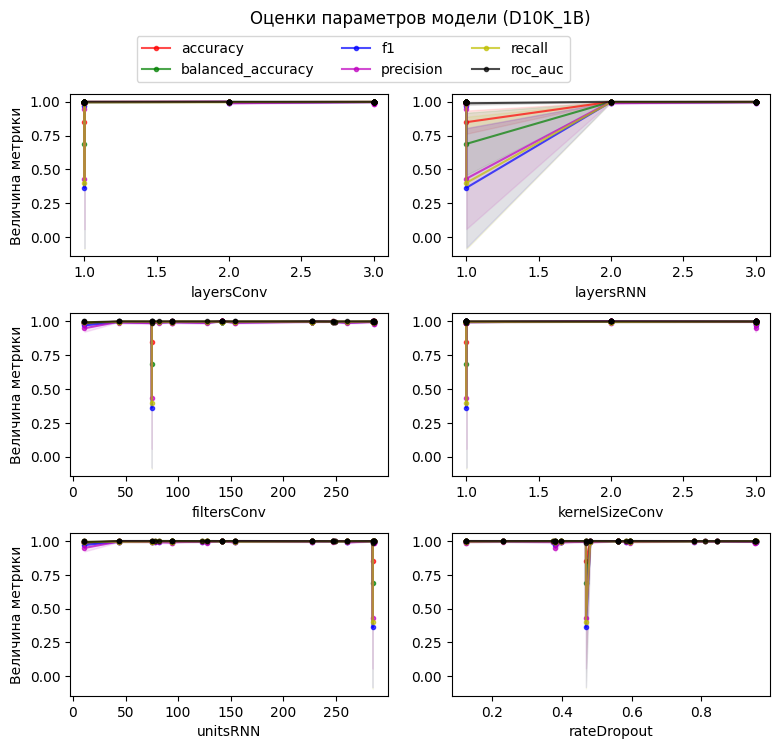

In [65]:
run_gasearch('1B')

#### 4.1.2. Набор по критерию RF (D10K_2B) <a id="pld1_2"></a>

**Поиск гиперпараметров генетическим алгоритмом:**

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.977038	0.0660543  	0.999375   	0.778875   
1  	20    	0.99915 	0.000134629	0.999375   	0.999      
2  	20    	0.9993  	6.12372e-05	0.999375   	0.99925    
Best Score:  0.999375


**Лучшие параметры при поиске:**

colCount                11
layersConv               2
layersRNN                3
filtersConv              9
kernelSizeConv           2
unitsRNN               227
rateDropout       0.775328
optimizer              SGD


**Структура нейросети:**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 11, 9)             27        
                                                                 
 conv1d_3 (Conv1D)           (None, 11, 9)             171       
                                                                 
 bidirectional_2 (Bidirecti  (None, 11, 454)           107598    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 11, 454)           309628    
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 454)               309628    
 onal)                                                           
                                                      

**Результаты расчёта метрик:**

*Обучение (D10K_2B):*

Матрица ошибок<br>$\begin{pmatrix} 6231 & 0 \\ 4 & 1765 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6231
           1       1.00      1.00      1.00      1769

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    


*Тестирование (D10K_2B):*

Матрица ошибок<br>$\begin{pmatrix} 1556 & 0 \\ 0 & 444 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       1.00      1.00      1.00       444

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    
['model__colCount', 'model__layersConv', 'model__layersRNN', 'model__filtersConv', 'model__kernelSizeConv', 'model__unitsRNN', 'model__rateDropout', 'model__optimizer']
['model__colCount', 'model__optimizer']


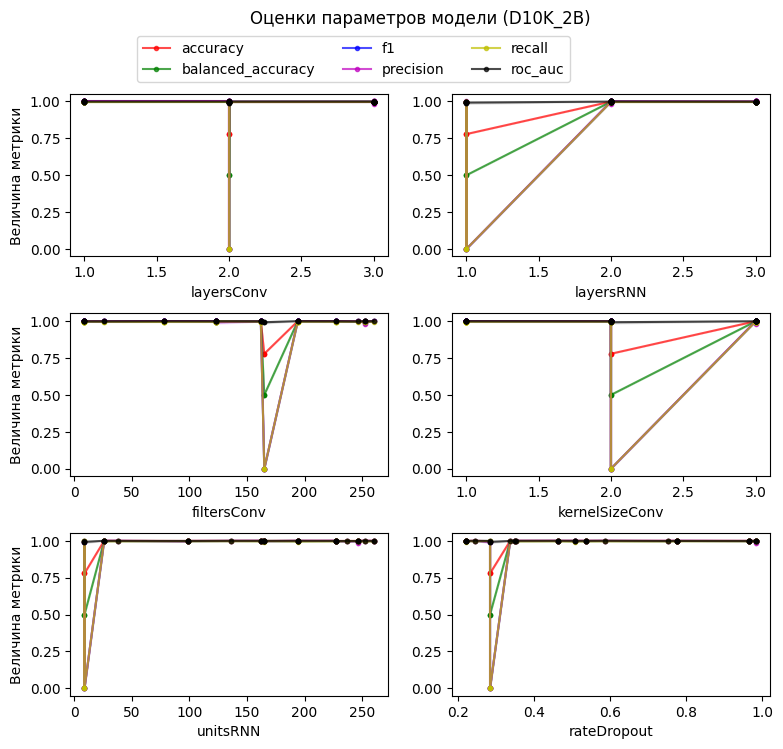

In [66]:
run_gasearch('2B')

#### 4.1.3. Набор по критерию SKB (D10K_3B) <a id="pld1_3"></a>

**Поиск гиперпараметров генетическим алгоритмом:**

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.998587	5.72822e-05	0.998625   	0.9985     
1  	20    	0.998638	6.73146e-05	0.99875    	0.9985     
2  	20    	0.998687	6.25e-05   	0.99875    	0.998625   
Best Score:  0.998875


**Лучшие параметры при поиске:**

colCount                 4
layersConv               3
layersRNN                1
filtersConv            136
kernelSizeConv           1
unitsRNN                38
rateDropout       0.564462
optimizer          RMSprop


**Структура нейросети:**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 4, 136)            272       
                                                                 
 conv1d_5 (Conv1D)           (None, 4, 136)            18632     
                                                                 
 conv1d_6 (Conv1D)           (None, 4, 136)            18632     
                                                                 
 bidirectional_5 (Bidirecti  (None, 76)                13300     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 76)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 77        
                                                      

**Результаты расчёта метрик:**

*Обучение (D10K_3B):*

Матрица ошибок<br>$\begin{pmatrix} 6226 & 5 \\ 7 & 1762 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6231
           1       1.00      1.00      1.00      1769

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    


*Тестирование (D10K_3B):*

Матрица ошибок<br>$\begin{pmatrix} 1554 & 2 \\ 1 & 443 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       1.00      1.00      1.00       444

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    
['model__colCount', 'model__layersConv', 'model__layersRNN', 'model__filtersConv', 'model__kernelSizeConv', 'model__unitsRNN', 'model__rateDropout', 'model__optimizer']
['model__colCount', 'model__optimizer']


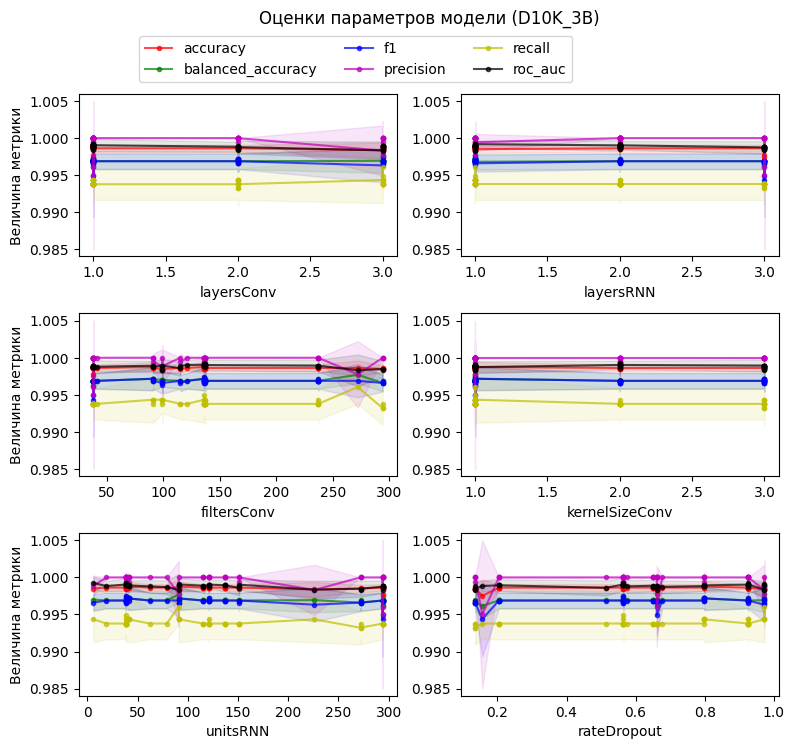

In [67]:
run_gasearch('3B')

#### 4.1.4. Масштабированный исходный набор (D10K_1M) <a id="pld1_4"></a>

**Поиск гиперпараметров генетическим алгоритмом:**

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.984287	0.040702   	0.99925    	0.86225    
1  	20    	0.998763	0.000648195	0.99925    	0.9975     
2  	20    	0.999075	0.000484768	0.99925    	0.997625   
Best Score:  0.99925


**Лучшие параметры при поиске:**

colCount                48
layersConv               3
layersRNN                2
filtersConv              6
kernelSizeConv           3
unitsRNN                36
rateDropout       0.855893
optimizer          RMSprop


**Структура нейросети:**

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 48, 6)             24        
                                                                 
 conv1d_8 (Conv1D)           (None, 48, 6)             114       
                                                                 
 conv1d_9 (Conv1D)           (None, 48, 6)             114       
                                                                 
 bidirectional_6 (Bidirecti  (None, 48, 72)            3096      
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 72)                7848      
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 72)               

**Результаты расчёта метрик:**

*Обучение (D10K_1M):*

Матрица ошибок<br>$\begin{pmatrix} 6222 & 9 \\ 4 & 1765 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6231
           1       0.99      1.00      1.00      1769

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    


*Тестирование (D10K_1M):*

Матрица ошибок<br>$\begin{pmatrix} 1555 & 1 \\ 0 & 444 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       1.00      1.00      1.00       444

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    
['model__colCount', 'model__layersConv', 'model__layersRNN', 'model__filtersConv', 'model__kernelSizeConv', 'model__unitsRNN', 'model__rateDropout', 'model__optimizer']
['model__colCount', 'model__optimizer']


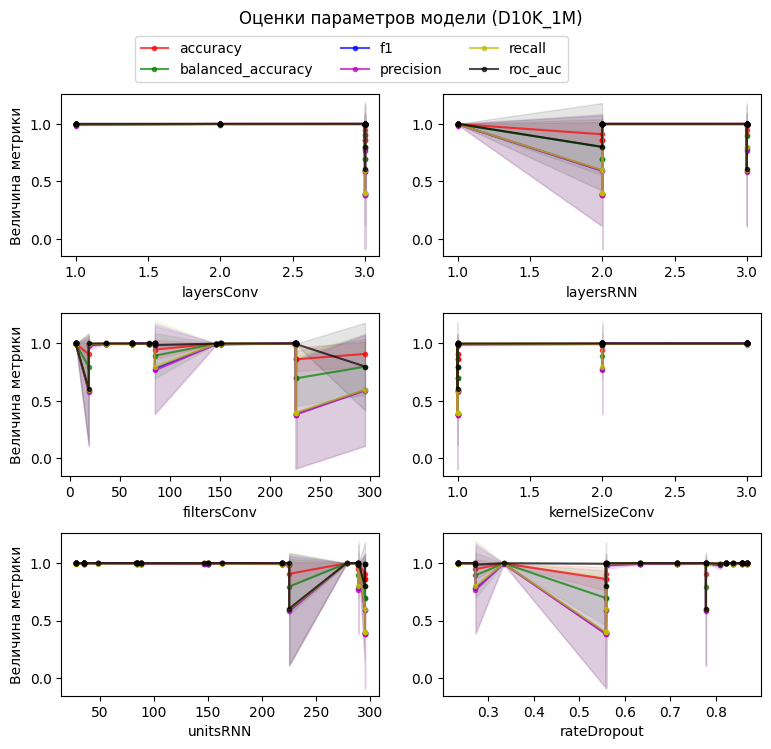

In [68]:
run_gasearch('1M')

#### 4.1.5. Масштабированный набор по критерию RF (D10K_2M) <a id="pld1_5"></a>

**Поиск гиперпараметров генетическим алгоритмом:**

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.997862	0.000975401	0.999      	0.99625    
1  	20    	0.998563	0.000756741	0.999125   	0.996375   
2  	20    	0.999075	0.000139194	0.99925    	0.99875    
Best Score:  0.99925


**Лучшие параметры при поиске:**

colCount                11
layersConv               2
layersRNN                1
filtersConv            278
kernelSizeConv           2
unitsRNN                35
rateDropout       0.346644
optimizer          RMSprop


**Структура нейросети:**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 11, 278)           834       
                                                                 
 conv1d_11 (Conv1D)          (None, 11, 278)           154846    
                                                                 
 bidirectional_8 (Bidirecti  (None, 70)                21980     
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 70)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 71        
                                                                 
Total params: 177731 (694.26 KB)
Trainable params: 177731 (694.26 KB)
Non-trainable params: 0 (0.00 Byte)
______________

**Результаты расчёта метрик:**

*Обучение (D10K_2M):*

Матрица ошибок<br>$\begin{pmatrix} 6231 & 0 \\ 6 & 1763 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6231
           1       1.00      1.00      1.00      1769

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    


*Тестирование (D10K_2M):*

Матрица ошибок<br>$\begin{pmatrix} 1556 & 0 \\ 0 & 444 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       1.00      1.00      1.00       444

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    
['model__colCount', 'model__layersConv', 'model__layersRNN', 'model__filtersConv', 'model__kernelSizeConv', 'model__unitsRNN', 'model__rateDropout', 'model__optimizer']
['model__colCount', 'model__optimizer']


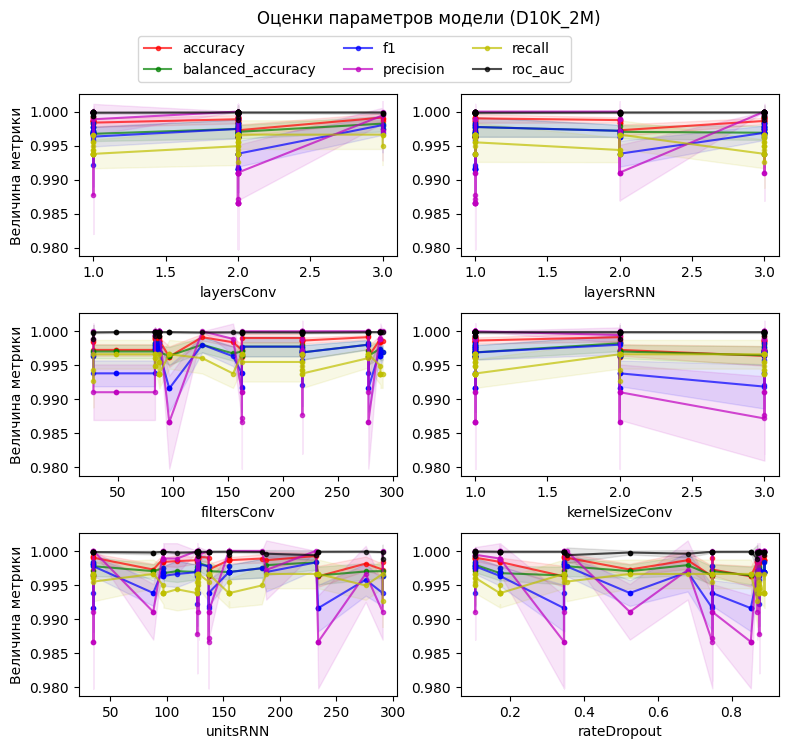

In [69]:
run_gasearch('2M')

#### 4.1.6. Масштабированный набор по критерию SKB (D10K_3M) <a id="pld1_6"></a>

**Поиск гиперпараметров генетическим алгоритмом:**

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.997837	0.000639946	0.998625   	0.99675    
1  	20    	0.99855 	0.000340955	0.999      	0.99775    
2  	20    	0.99875 	0.000167705	0.999      	0.998625   
Best Score:  0.9990000000000002


**Лучшие параметры при поиске:**

colCount                 4
layersConv               3
layersRNN                3
filtersConv            188
kernelSizeConv           3
unitsRNN               232
rateDropout       0.967304
optimizer              SGD


**Структура нейросети:**

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 4, 188)            752       
                                                                 
 conv1d_13 (Conv1D)          (None, 4, 188)            106220    
                                                                 
 conv1d_14 (Conv1D)          (None, 4, 188)            106220    
                                                                 
 bidirectional_9 (Bidirecti  (None, 4, 464)            195344    
 onal)                                                           
                                                                 
 bidirectional_10 (Bidirect  (None, 4, 464)            323408    
 ional)                                                          
                                                                 
 bidirectional_11 (Bidirect  (None, 464)              

**Результаты расчёта метрик:**

*Обучение (D10K_3M):*

Матрица ошибок<br>$\begin{pmatrix} 6231 & 0 \\ 9 & 1760 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6231
           1       1.00      0.99      1.00      1769

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    


*Тестирование (D10K_3M):*

Матрица ошибок<br>$\begin{pmatrix} 1556 & 0 \\ 1 & 443 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       1.00      1.00      1.00       444

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    
['model__colCount', 'model__layersConv', 'model__layersRNN', 'model__filtersConv', 'model__kernelSizeConv', 'model__unitsRNN', 'model__rateDropout', 'model__optimizer']
['model__colCount', 'model__optimizer']


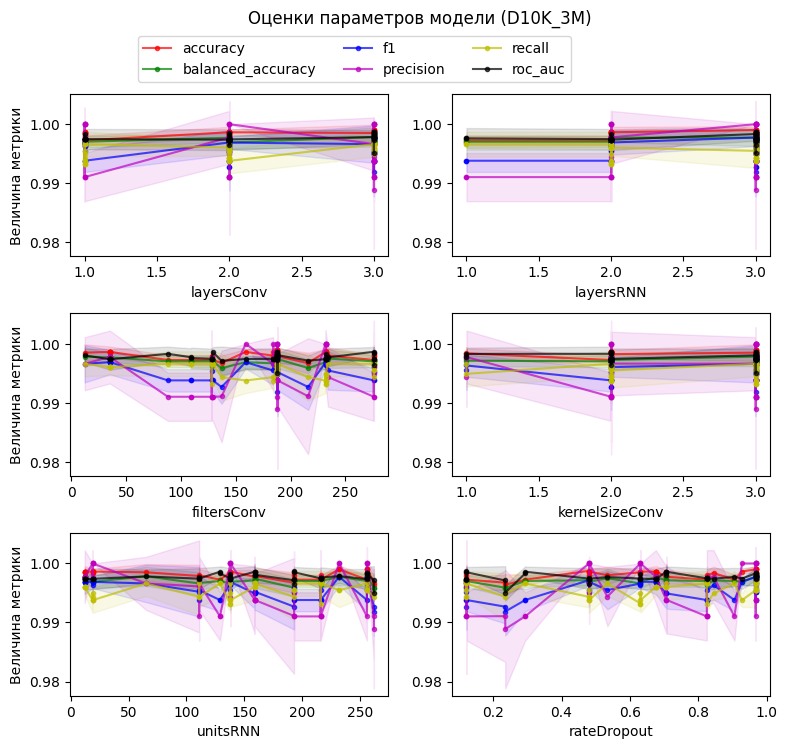

In [70]:
run_gasearch('3M')

#### 4.1.7. Стандартизированный исходный набор (D10K_1S) <a id="pld1_7"></a>

**Поиск гиперпараметров генетическим алгоритмом:**

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.994712	0.0134932  	0.99975    	0.95425    
1  	20    	0.9994  	0.000261008	0.99975    	0.999      
2  	20    	0.99945 	0.000210654	0.99975    	0.999125   
Best Score:  0.99975


**Лучшие параметры при поиске:**

colCount                48
layersConv               2
layersRNN                3
filtersConv            138
kernelSizeConv           3
unitsRNN               252
rateDropout       0.290507
optimizer          RMSprop


**Структура нейросети:**

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 48, 138)           552       
                                                                 
 conv1d_16 (Conv1D)          (None, 48, 138)           57270     
                                                                 
 bidirectional_12 (Bidirect  (None, 48, 504)           197064    
 ional)                                                          
                                                                 
 bidirectional_13 (Bidirect  (None, 48, 504)           381528    
 ional)                                                          
                                                                 
 bidirectional_14 (Bidirect  (None, 504)               381528    
 ional)                                                          
                                                      

**Результаты расчёта метрик:**

*Обучение (D10K_1S):*

Матрица ошибок<br>$\begin{pmatrix} 6230 & 1 \\ 3 & 1766 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6231
           1       1.00      1.00      1.00      1769

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    


*Тестирование (D10K_1S):*

Матрица ошибок<br>$\begin{pmatrix} 1555 & 1 \\ 0 & 444 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       1.00      1.00      1.00       444

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    
['model__colCount', 'model__layersConv', 'model__layersRNN', 'model__filtersConv', 'model__kernelSizeConv', 'model__unitsRNN', 'model__rateDropout', 'model__optimizer']
['model__colCount', 'model__optimizer']


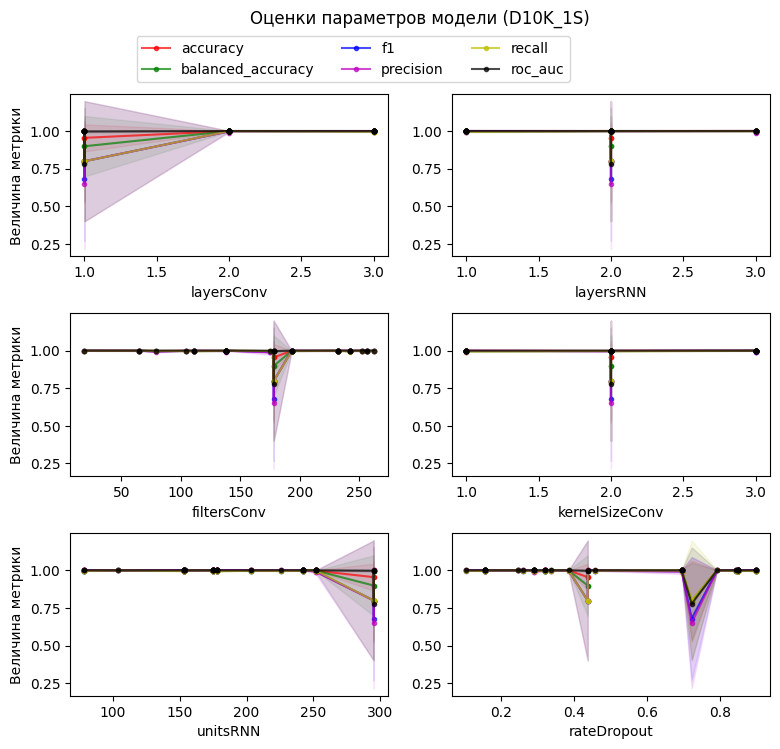

In [71]:
run_gasearch('1S')

#### 4.1.8. Стандартизированный набор по критерию RF (D10K_2S) <a id="pld1_8"></a>

**Поиск гиперпараметров генетическим алгоритмом:**

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.998762	0.000736228	0.99925    	0.99725    


s:\Users\Alexander\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


1  	20    	0.999175	0.000114564	0.99925    	0.999      
2  	20    	0.99925 	0          	0.99925    	0.99925    
Best Score:  0.99925


**Лучшие параметры при поиске:**

colCount                11
layersConv               3
layersRNN                2
filtersConv            203
kernelSizeConv           2
unitsRNN                45
rateDropout       0.195329
optimizer          RMSprop


**Структура нейросети:**

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_17 (Conv1D)          (None, 11, 203)           609       
                                                                 
 conv1d_18 (Conv1D)          (None, 11, 203)           82621     
                                                                 
 conv1d_19 (Conv1D)          (None, 11, 203)           82621     
                                                                 
 bidirectional_15 (Bidirect  (None, 11, 90)            22410     
 ional)                                                          
                                                                 
 bidirectional_16 (Bidirect  (None, 90)                12240     
 ional)                                                          
                                                                 
 dropout_7 (Dropout)         (None, 90)               

**Результаты расчёта метрик:**

*Обучение (D10K_2S):*

Матрица ошибок<br>$\begin{pmatrix} 6231 & 0 \\ 6 & 1763 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6231
           1       1.00      1.00      1.00      1769

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    


*Тестирование (D10K_2S):*

Матрица ошибок<br>$\begin{pmatrix} 1556 & 0 \\ 0 & 444 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       1.00      1.00      1.00       444

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    
['model__colCount', 'model__layersConv', 'model__layersRNN', 'model__filtersConv', 'model__kernelSizeConv', 'model__unitsRNN', 'model__rateDropout', 'model__optimizer']
['model__colCount', 'model__optimizer']


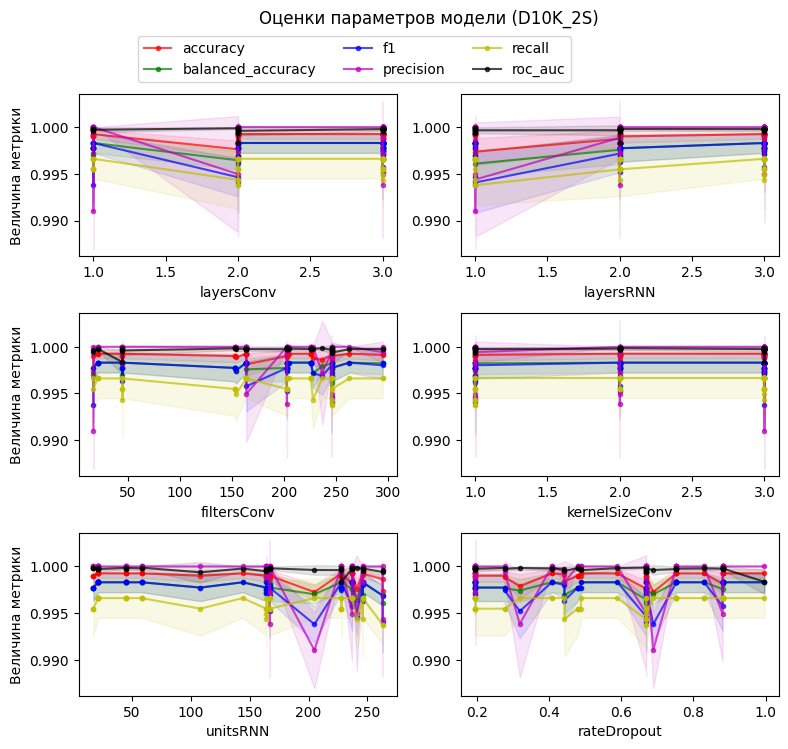

In [72]:
run_gasearch('2S')

#### 4.1.9. Стандартизированный набор по критерию SKB (D10K_3S) <a id="pld1_9"></a>

**Поиск гиперпараметров генетическим алгоритмом:**

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	10    	0.99865	0.000215058	0.999      	0.998125   
1  	20    	0.9988 	0.000127475	0.999      	0.998625   
2  	20    	0.99895	6.12372e-05	0.999      	0.998875   
Best Score:  0.9990000000000002


**Лучшие параметры при поиске:**

colCount                 4
layersConv               3
layersRNN                2
filtersConv            108
kernelSizeConv           1
unitsRNN               201
rateDropout       0.786816
optimizer              SGD


**Структура нейросети:**

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 4, 108)            216       
                                                                 
 conv1d_21 (Conv1D)          (None, 4, 108)            11772     
                                                                 
 conv1d_22 (Conv1D)          (None, 4, 108)            11772     
                                                                 
 bidirectional_17 (Bidirect  (None, 4, 402)            124620    
 ional)                                                          
                                                                 
 bidirectional_18 (Bidirect  (None, 402)               242808    
 ional)                                                          
                                                                 
 dropout_8 (Dropout)         (None, 402)              

**Результаты расчёта метрик:**

*Обучение (D10K_3S):*

Матрица ошибок<br>$\begin{pmatrix} 6231 & 0 \\ 9 & 1760 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6231
           1       1.00      0.99      1.00      1769

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    


*Тестирование (D10K_3S):*

Матрица ошибок<br>$\begin{pmatrix} 1556 & 0 \\ 1 & 443 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       1.00      1.00      1.00       444

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    
['model__colCount', 'model__layersConv', 'model__layersRNN', 'model__filtersConv', 'model__kernelSizeConv', 'model__unitsRNN', 'model__rateDropout', 'model__optimizer']
['model__colCount', 'model__optimizer']


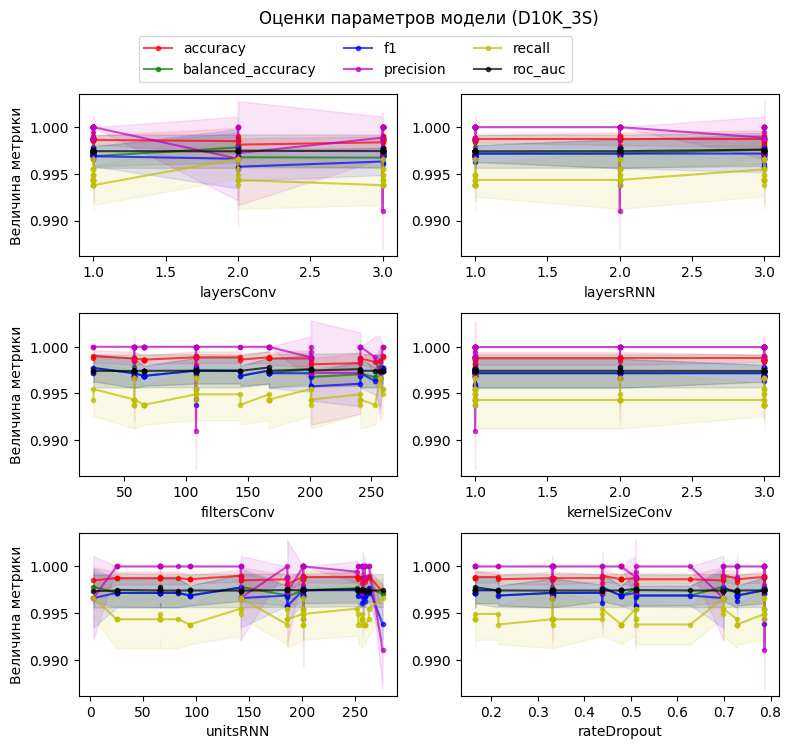

In [73]:
run_gasearch('3S')

#### 4.1.10. Нормализованный исходный набор (D10K_1N) <a id="pld1_10"></a>

**Поиск гиперпараметров генетическим алгоритмом:**

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.981475	0.0227732  	0.9985     	0.942125   
1  	20    	0.997412	0.00145565 	0.9985     	0.99425    
2  	20    	0.99805 	0.00103108 	0.9985     	0.995125   
Best Score:  0.9987499999999999


**Лучшие параметры при поиске:**

colCount                48
layersConv               3
layersRNN                2
filtersConv            194
kernelSizeConv           2
unitsRNN                65
rateDropout       0.382721
optimizer          RMSprop


**Структура нейросети:**

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_23 (Conv1D)          (None, 48, 194)           582       
                                                                 
 conv1d_24 (Conv1D)          (None, 48, 194)           75466     
                                                                 
 conv1d_25 (Conv1D)          (None, 48, 194)           75466     
                                                                 
 bidirectional_19 (Bidirect  (None, 48, 130)           33800     
 ional)                                                          
                                                                 
 bidirectional_20 (Bidirect  (None, 130)               25480     
 ional)                                                          
                                                                 
 dropout_9 (Dropout)         (None, 130)              

**Результаты расчёта метрик:**

*Обучение (D10K_1N):*

Матрица ошибок<br>$\begin{pmatrix} 6222 & 9 \\ 7 & 1762 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6231
           1       0.99      1.00      1.00      1769

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    


*Тестирование (D10K_1N):*

Матрица ошибок<br>$\begin{pmatrix} 1556 & 0 \\ 1 & 443 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       1.00      1.00      1.00       444

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    
['model__colCount', 'model__layersConv', 'model__layersRNN', 'model__filtersConv', 'model__kernelSizeConv', 'model__unitsRNN', 'model__rateDropout', 'model__optimizer']
['model__colCount', 'model__optimizer']


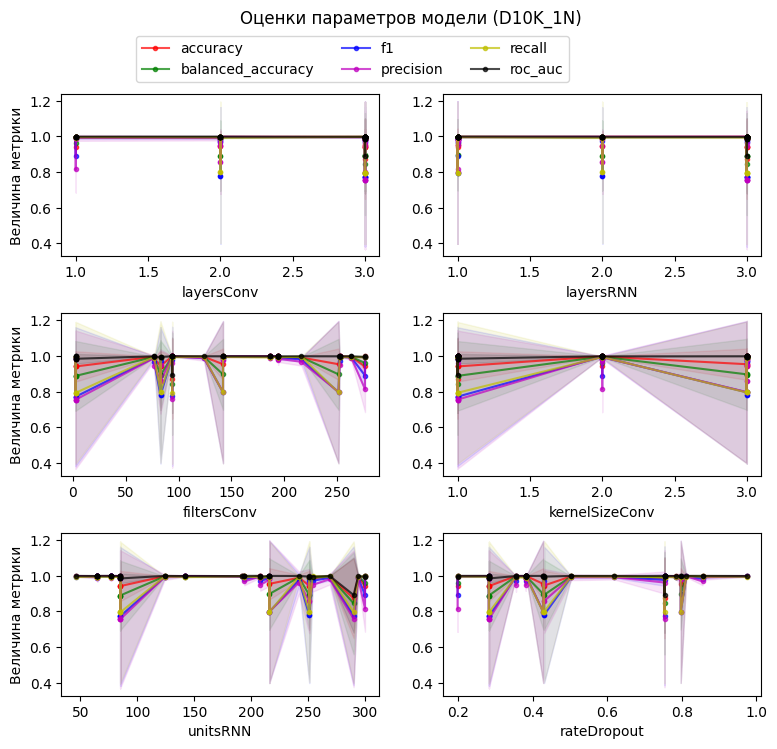

In [74]:
run_gasearch('1N')

#### 4.1.11. Нормализованный набор по критерию RF (D10K_2N) <a id="pld1_11"></a>

**Поиск гиперпараметров генетическим алгоритмом:**

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.998237	0.00081672 	0.998875   	0.996125   
1  	20    	0.998687	0.000322345	0.998875   	0.99775    
2  	20    	0.998875	0          	0.998875   	0.998875   
Best Score:  0.999


**Лучшие параметры при поиске:**

colCount                11
layersConv               3
layersRNN                3
filtersConv             85
kernelSizeConv           3
unitsRNN               240
rateDropout       0.169375
optimizer              SGD


**Структура нейросети:**

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 11, 85)            340       
                                                                 
 conv1d_27 (Conv1D)          (None, 11, 85)            21760     
                                                                 
 conv1d_28 (Conv1D)          (None, 11, 85)            21760     
                                                                 
 bidirectional_21 (Bidirect  (None, 11, 480)           156480    
 ional)                                                          
                                                                 
 bidirectional_22 (Bidirect  (None, 11, 480)           346080    
 ional)                                                          
                                                                 
 bidirectional_23 (Bidirect  (None, 480)             

**Результаты расчёта метрик:**

*Обучение (D10K_2N):*

Матрица ошибок<br>$\begin{pmatrix} 6227 & 4 \\ 6 & 1763 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6231
           1       1.00      1.00      1.00      1769

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    


*Тестирование (D10K_2N):*

Матрица ошибок<br>$\begin{pmatrix} 1555 & 1 \\ 1 & 443 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       1.00      1.00      1.00       444

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    
['model__colCount', 'model__layersConv', 'model__layersRNN', 'model__filtersConv', 'model__kernelSizeConv', 'model__unitsRNN', 'model__rateDropout', 'model__optimizer']
['model__colCount', 'model__optimizer']


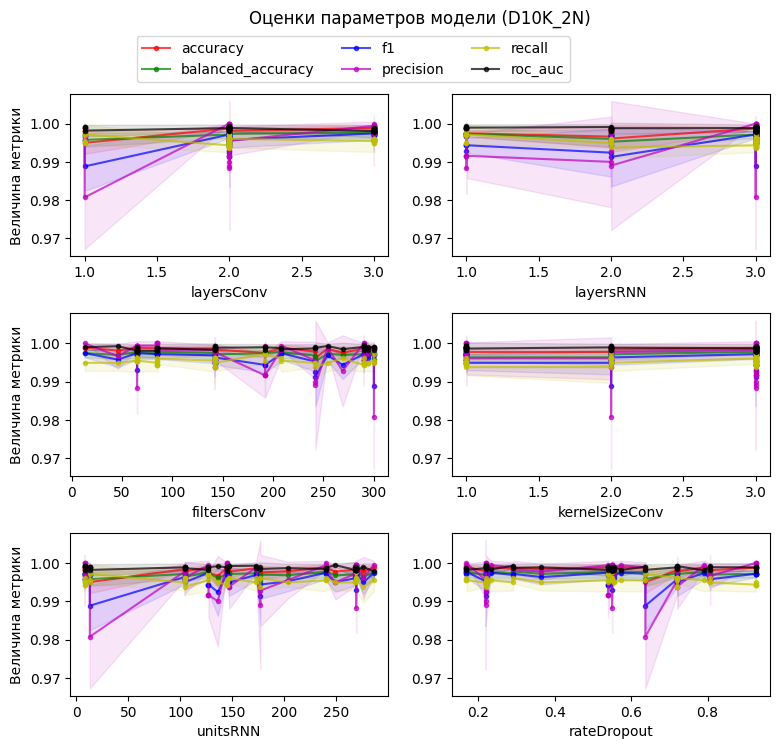

In [75]:
run_gasearch('2N')

#### 4.1.12. Нормализованный набор по критерию SKB (D10K_3N) <a id="pld1_12"></a>

**Поиск гиперпараметров генетическим алгоритмом:**

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.975187	0.0654377  	0.997375   	0.778875   
1  	20    	0.997025	0.000183712	0.997375   	0.996875   
2  	20    	0.997138	0.000258904	0.9975     	0.996875   
Best Score:  0.9975000000000002


**Лучшие параметры при поиске:**

colCount                 4
layersConv               2
layersRNN                3
filtersConv            173
kernelSizeConv           2
unitsRNN                22
rateDropout       0.760231
optimizer             Adam


**Структура нейросети:**

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_29 (Conv1D)          (None, 4, 173)            519       
                                                                 
 conv1d_30 (Conv1D)          (None, 4, 173)            60031     
                                                                 
 bidirectional_24 (Bidirect  (None, 4, 44)             8624      
 ional)                                                          
                                                                 
 bidirectional_25 (Bidirect  (None, 4, 44)             2948      
 ional)                                                          
                                                                 
 bidirectional_26 (Bidirect  (None, 44)                2948      
 ional)                                                          
                                                     

**Результаты расчёта метрик:**

*Обучение (D10K_3N):*

Матрица ошибок<br>$\begin{pmatrix} 6228 & 3 \\ 17 & 1752 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6231
           1       1.00      0.99      0.99      1769

    accuracy                           1.00      8000
   macro avg       1.00      0.99      1.00      8000
weighted avg       1.00      1.00      1.00      8000

    balanced_accuracy = 0.99
    roc_auc = 0.99
    


*Тестирование (D10K_3N):*

Матрица ошибок<br>$\begin{pmatrix} 1554 & 2 \\ 6 & 438 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       1.00      0.99      0.99       444

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

    balanced_accuracy = 0.99
    roc_auc = 0.99
    
['model__colCount', 'model__layersConv', 'model__layersRNN', 'model__filtersConv', 'model__kernelSizeConv', 'model__unitsRNN', 'model__rateDropout', 'model__optimizer']
['model__colCount', 'model__optimizer']


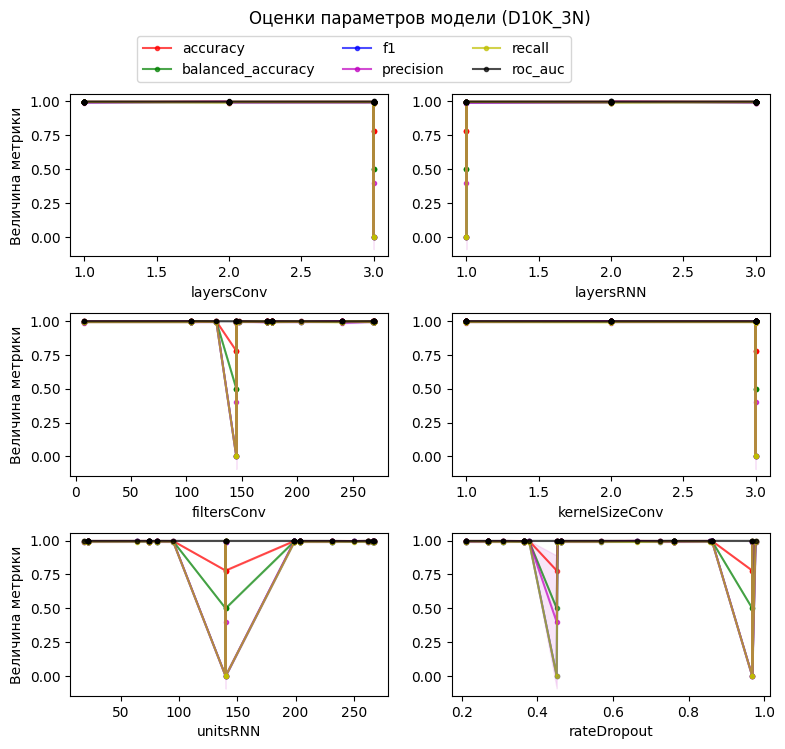

In [76]:
run_gasearch('3N')

#### 4.1.13. Анализ результатов <a id="pld1_13"></a>  
Оценки при прогнозе тестовых наборов:

In [80]:
gaTrainScore.round(5)

,accuracy,precision,recall,f1,balanced_accuracy,roc_auc
D10K_1B,0.99925,0.99952,0.99830,0.99891,0.99830,0.99830
D10K_2B,0.99950,0.99968,0.99887,0.99927,0.99887,0.99887
D10K_3B,0.99850,0.99802,0.99762,0.99782,0.99762,0.99762
D10K_1M,0.99838,0.99714,0.99815,0.99764,0.99815,0.99815
D10K_2M,0.99925,0.99952,0.99830,0.99891,0.99830,0.99830
D10K_3M,0.99888,0.99928,0.99746,0.99836,0.99746,0.99746
D10K_1S,0.99950,0.99948,0.99907,0.99927,0.99907,0.99907
D10K_2S,0.99925,0.99952,0.99830,0.99891,0.99830,0.99830
D10K_3S,0.99888,0.99928,0.99746,0.99836,0.99746,0.99746
D10K_1N,0.99800,0.99690,0.99730,0.99710,0.99730,0.99730


Оценки при прогнозе тестовых наборов:

In [81]:
gaTestScore.round(5)

,accuracy,precision,recall,f1,balanced_accuracy,roc_auc
D10K_1B,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000
D10K_2B,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000
D10K_3B,0.9985,0.99743,0.99823,0.99783,0.99823,0.99823
D10K_1M,0.9995,0.99888,0.99968,0.99928,0.99968,0.99968
D10K_2M,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000
D10K_3M,0.9995,0.99968,0.99887,0.99928,0.99887,0.99887
D10K_1S,0.9995,0.99888,0.99968,0.99928,0.99968,0.99968
D10K_2S,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000
D10K_3S,0.9995,0.99968,0.99887,0.99928,0.99887,0.99887
D10K_1N,0.9995,0.99968,0.99887,0.99928,0.99887,0.99887


Перечень лучших комбинаций параметров для каждого набора:

In [79]:
gaBestParams.round(2)

,colCount,layersConv,layersRNN,filtersConv,kernelSizeConv,unitsRNN,rateDropout,optimizer
D10K_1B,48,2,2,142,2,142,0.56,SGD
D10K_2B,11,2,3,9,2,227,0.78,SGD
D10K_3B,4,3,1,136,1,38,0.56,RMSprop
D10K_1M,48,3,2,6,3,36,0.86,RMSprop
D10K_2M,11,2,1,278,2,35,0.35,RMSprop
D10K_3M,4,3,3,188,3,232,0.97,SGD
D10K_1S,48,2,3,138,3,252,0.29,RMSprop
D10K_2S,11,3,2,203,2,45,0.20,RMSprop
D10K_3S,4,3,2,108,1,201,0.79,SGD
D10K_1N,48,3,2,194,2,65,0.38,RMSprop


### 4.2 Поиск параметров по сетке<a id="pld2"></a>

Так как все наборы имеют близкие оценки к 1, то для простоты и ускорения вычислений, был выбран исходный набор из 4 столбцов: count, srv_count, protocol_type_icmp, service_ecr_i.  
Также были зафиксированы параметры: layersConv, layersRNN и optimizer.

In [89]:
abbr = '3B'
gaBestParams.round(2).T[[f'D10K_{abbr}']].T

,colCount,layersConv,layersRNN,filtersConv,kernelSizeConv,unitsRNN,rateDropout,optimizer
D10K_3B,4,3,1,136,1,38,0.56,RMSprop


**Поиск гиперпараметров по сетке:**

s:\Users\Alexander\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Score:  0.99925


**Лучшие параметры при поиске:**

colCount                4
filtersConv           145
kernelSizeConv          1
layersConv              3
layersRNN               1
optimizer         RMSprop
rateDropout          0.56
unitsRNN               40


**Структура нейросети:**

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_31 (Conv1D)          (None, 4, 145)            290       
                                                                 
 conv1d_32 (Conv1D)          (None, 4, 145)            21170     
                                                                 
 conv1d_33 (Conv1D)          (None, 4, 145)            21170     
                                                                 
 bidirectional_27 (Bidirect  (None, 80)                14880     
 ional)                                                          
                                                                 
 dropout_12 (Dropout)        (None, 80)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 81        
                                                     

**Результаты расчёта метрик:**

*Обучение (D10K_3B):*

Матрица ошибок<br>$\begin{pmatrix} 6231 & 0 \\ 6 & 1763 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6231
           1       1.00      1.00      1.00      1769

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    


*Тестирование (D10K_3B):*

Матрица ошибок<br>$\begin{pmatrix} 1556 & 0 \\ 1 & 443 \\ \end{pmatrix} $

Отчёт о классификации
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       1.00      1.00      1.00       444

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

    balanced_accuracy = 1.00
    roc_auc = 1.00
    
['model__colCount', 'model__layersConv', 'model__layersRNN', 'model__filtersConv', 'model__kernelSizeConv', 'model__unitsRNN', 'model__rateDropout', 'model__optimizer']
['model__layersConv', 'model__layersRNN', 'model__colCount', 'model__optimizer']


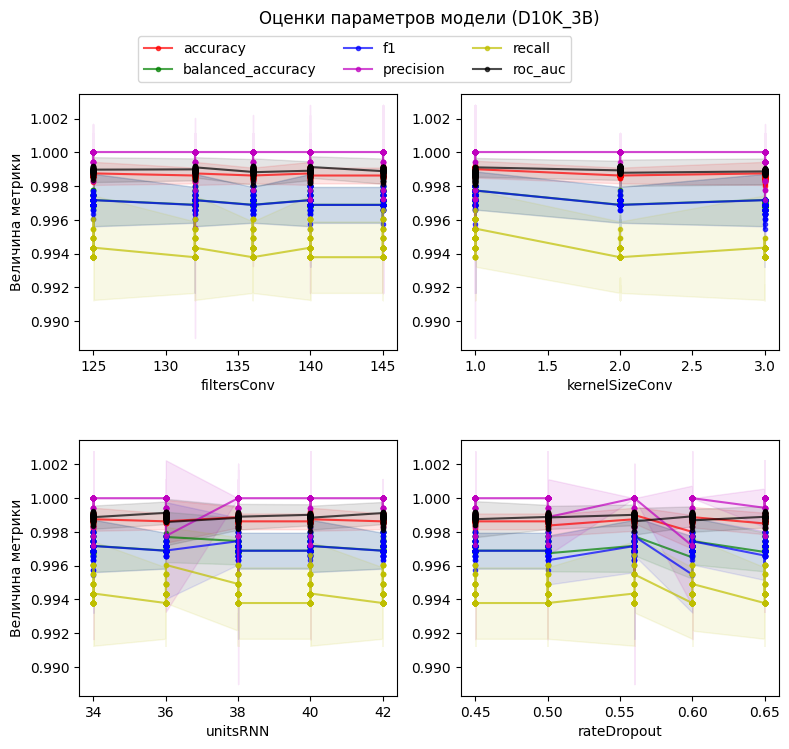

In [90]:
gridParams = {
    'model__colCount': [4],
    'model__layersConv': [3],
    'model__layersRNN': [1],
    'model__filtersConv': [125, 132, 136, 140, 145],
    'model__kernelSizeConv': [1, 2, 3],
    'model__unitsRNN': [34, 36, 38, 40, 42],
    'model__rateDropout': [0.45, 0.50, 0.56, 0.60, 0.65],
    'model__optimizer': ['RMSprop']
}

data = D10K[abbr]
display(Markdown('**Поиск гиперпараметров по сетке:**'))
gridSearch = GridSearchCV(estimator=classifier,
                            param_grid=gridParams,
                            cv=5,
                            scoring=scoring,
                            refit=best_score,
                            n_jobs=-1,
                            return_train_score=True)
run_search(abbr, gridSearch, data,
    delList=['model__layersConv', 'model__layersRNN'])

### 4.3 Общий итог <a id="pld3"></a>
TO DO

## 5. Обработка неразмеченных данных <a id="pud"></a>

TO DO

## 6. Дообучение нейронной сети <a id="ald"></a>

TO DO

## 7. Выводы <a id="conclusions"></a>



TO DO

## 8. Список литературы <a id="references"></a>
1. Подготовленные данные (https://github.com/Demetrey/DMaP/tree/CP/CP/datasets); <a id="l1"></a>
2. Датасет NSL-KDD (https://github.com/defcom17/NSL_KDD); <a id="l2"></a>
3. Е.М. Бурлаков Применение метода анализа соответствий для оптимизации комбинаций атрибутов у наборов данных. Вестник ПНИПУ. Электротехника, информационные технологии, системы управления №26, 2018; <a id="l3"></a>
4. L.Dhanabal, S.P. Shantharajah.  A Study on NSL-KDD Dataset for Intrusion Detection System Based on Classification Algorithms (https://e-tarjome.com/storage/btn_uploaded/2019-07-13/1563006133_9702-etarjome-English.pdf). <a id="l4"></a>